In [1]:
from trace_process_utils import *

mpl.rcParams['figure.dpi'] = 250

from pprint import pprint

## Original traces

In [2]:
# collection settings
sample_interval = 16e-9 # 16ns
fs = int(1/sample_interval)

In [3]:
trs_folder = "/mnt/jbod_main/public/qsp/trace_copilot/traces/"
# trs_file = "nrf52840.ecdsa.O3.ori.32000000.2.chB.trs"
trs_file = "nrf52840.ecdsa.O3.ori.32000000.2.chB.trs"
trs_path = trs_folder + trs_file

traces_ori, pts_ori = get_pico3203D_Trs(trs_path)

print(pts_ori.shape, pts_ori[0,:])
print(traces_ori.shape)

cryptoDataCount = 32
sampleLength = 2
sampleCoding = 0
pointNumber = 32000000
traceNumber = 2
traceFile = /mnt/jbod_main/public/qsp/trace_copilot/traces/nrf52840.ecdsa.O3.ori.32000000.2.chB.trs
[#########################                         ] 50% Extract Crypto Data Running...(2, 32) [ 57  12 140 125 114  71  52  44 216  16  15  47 111 119  13 101   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
(2, 32000000)


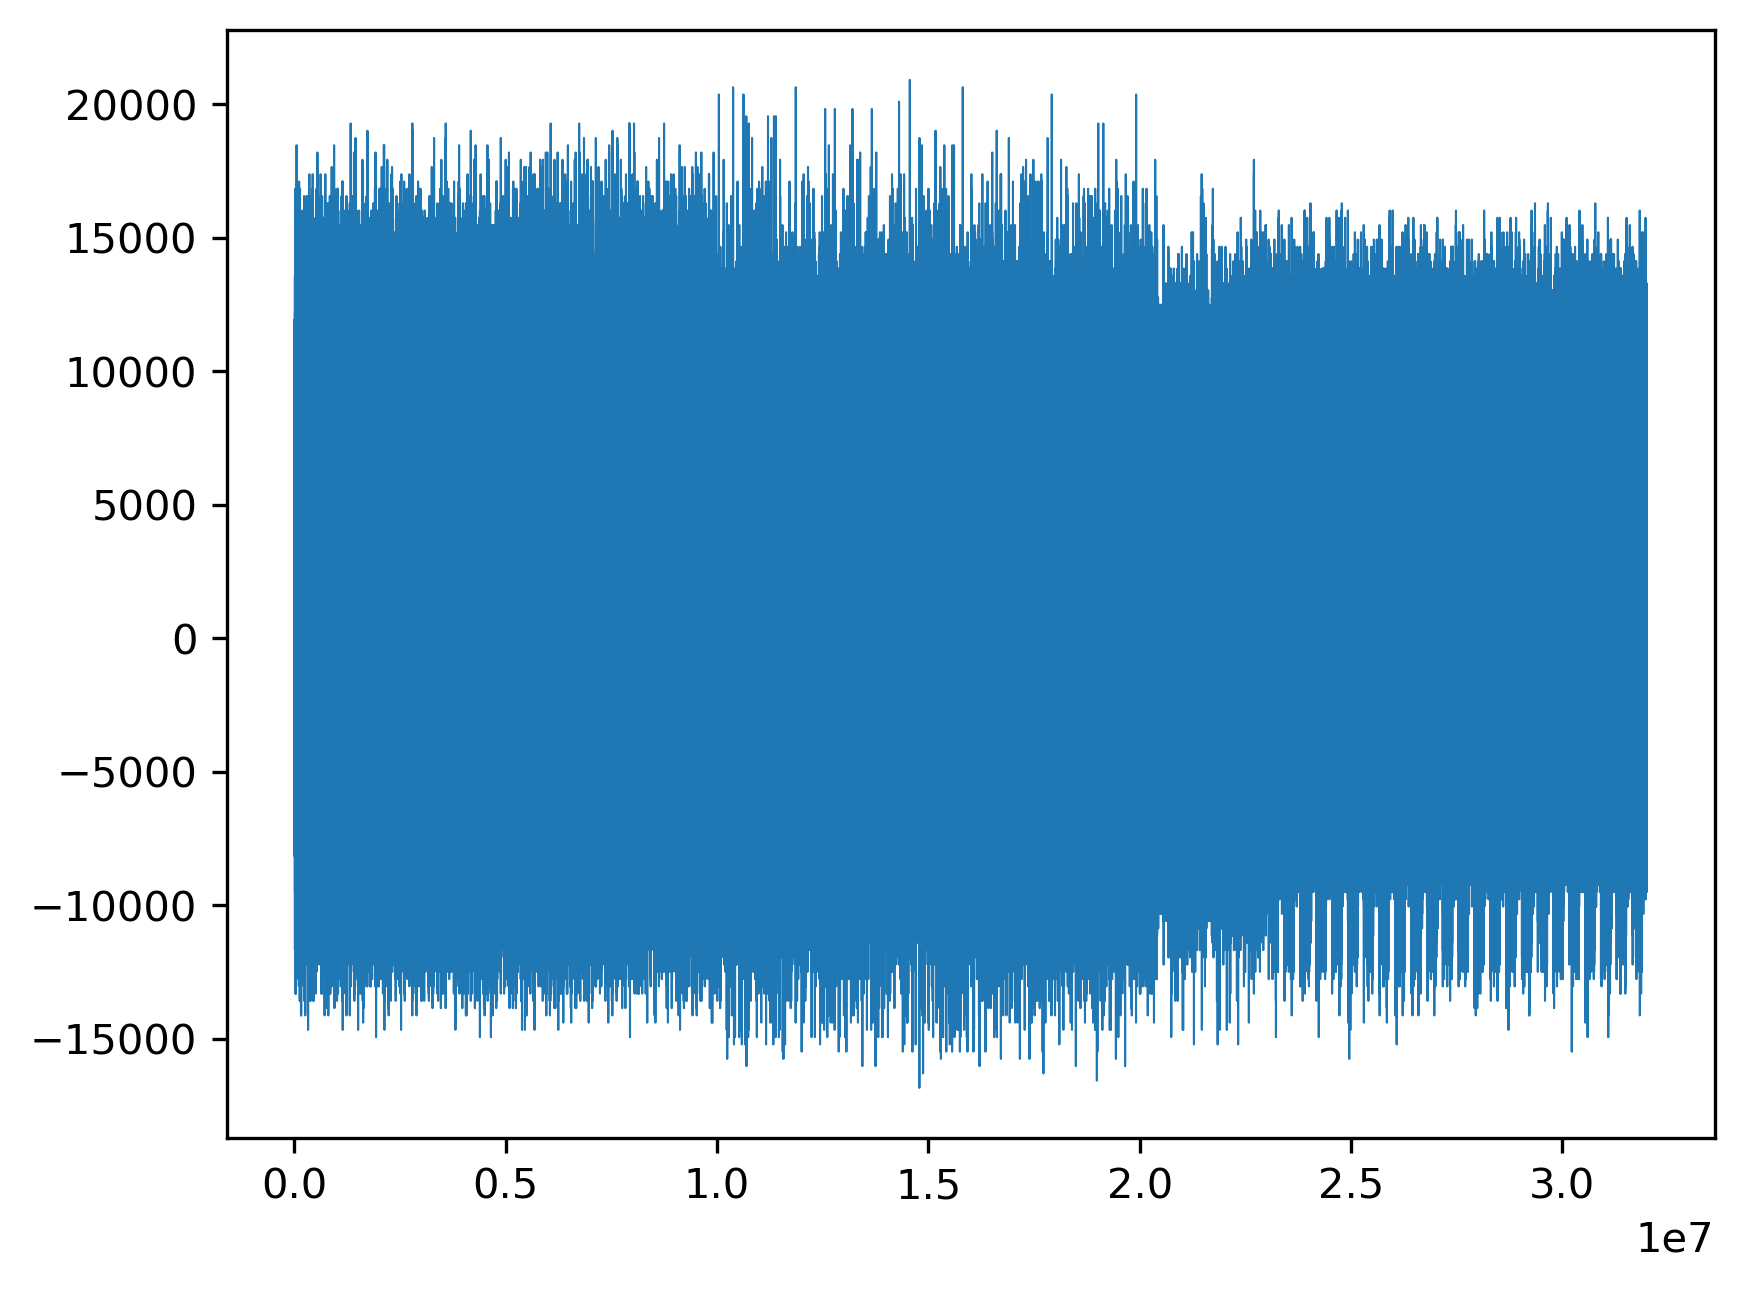

In [22]:
plt.plot(traces_ori[0, :], linewidth=0.5)
plt.show()

In [5]:
trs_folder = "/mnt/jbod_main/public/qsp/trace_copilot/traces/"
trs_file = "nrf52840.ecdsa.O3.ori.32000000.2.chA.trs"
trs_path = trs_folder + trs_file

trigger_trace_ori, _ = get_pico3203D_Trs(trs_path)

cryptoDataCount = 32
sampleLength = 2
sampleCoding = 0
pointNumber = 32000000
traceNumber = 2
traceFile = /mnt/jbod_main/public/qsp/trace_copilot/traces/nrf52840.ecdsa.O3.ori.32000000.2.chA.trs
[#########################                         ] 50% Extract Crypto Data Running...

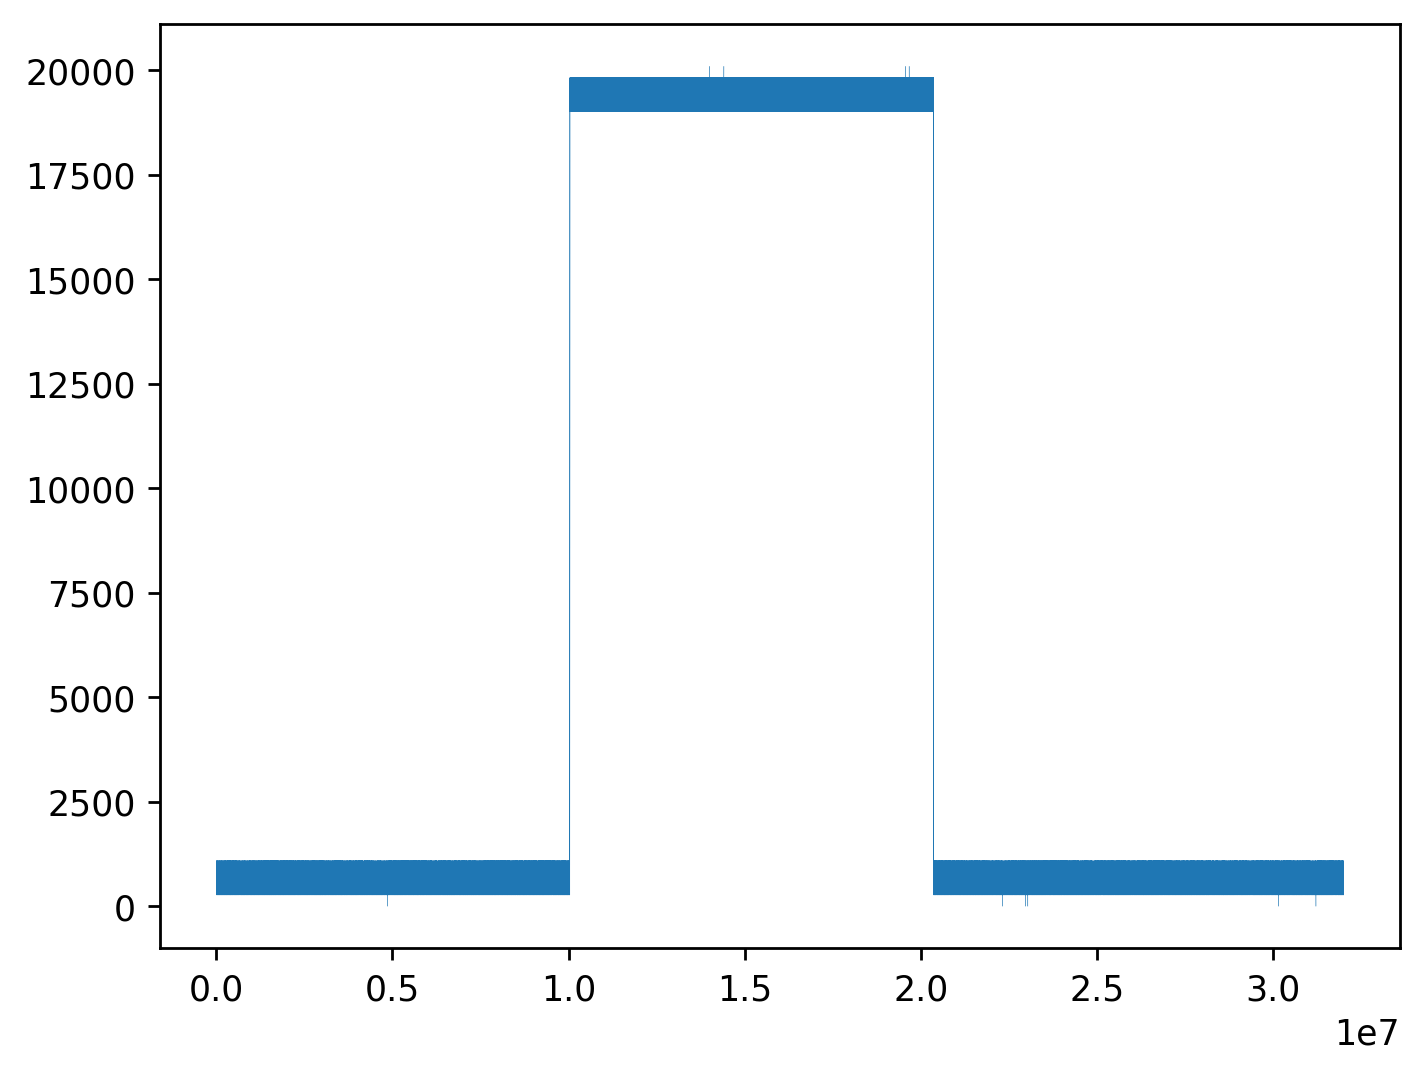

In [6]:
plt.plot(trigger_trace_ori[0, :], linewidth=0.1)
plt.show()

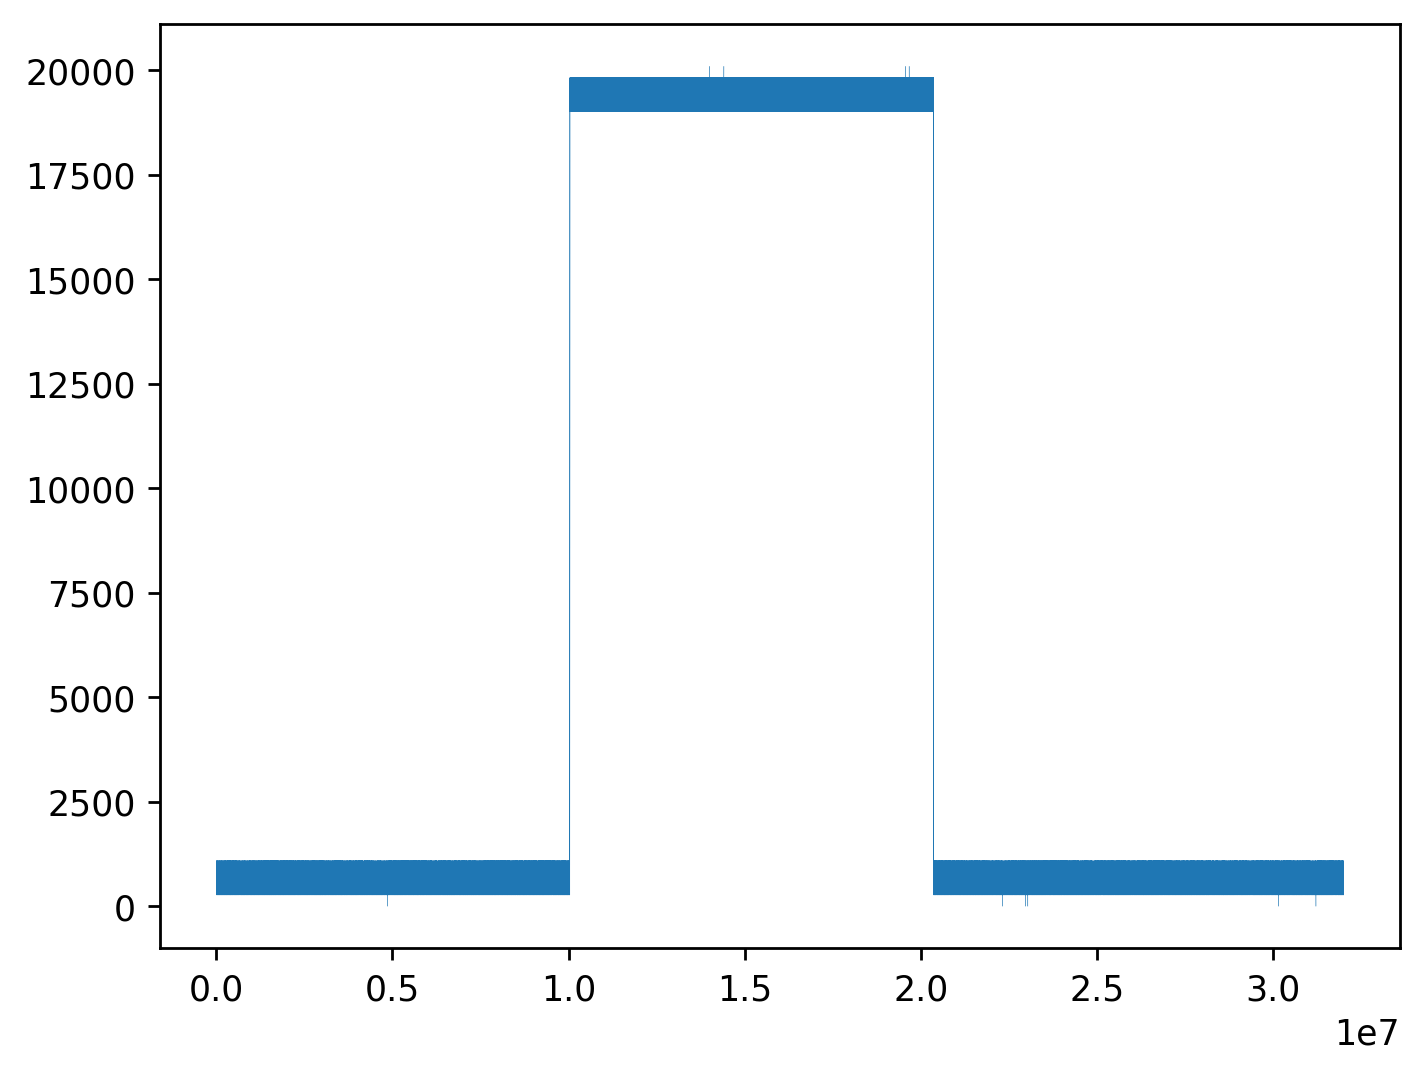

In [7]:
start_ori = 0
end_ori = traces_ori.shape[1]
trigger_trace_ori_local = trigger_trace_ori[0, start_ori:end_ori]
plt.plot(trigger_trace_ori_local, linewidth=0.1)
plt.show()

In [ ]:
start = 0
end = traces_ori.shape[1]
plot_spectrom(channel_data=traces_ori[0, start:end], fs=int(1/sample_interval), nperseg=512) 

## Instrumented traces

In [9]:
trs_folder = "/mnt/jbod_main/public/qsp/trace_copilot/traces/"
trs_file = "nrf52840.ecdsa.O3.patched.32000000.2.chB.trs"
trs_path = trs_folder + trs_file

traces_patched, pts_patched = get_pico3203D_Trs(trs_path)

print(pts_patched.shape, pts_patched[0,:])
print(traces_patched.shape)

cryptoDataCount = 32
sampleLength = 2
sampleCoding = 0
pointNumber = 32000000
traceNumber = 2
traceFile = /mnt/jbod_main/public/qsp/trace_copilot/traces/nrf52840.ecdsa.O3.patched.32000000.2.chB.trs
[#########################                         ] 50% Extract Crypto Data Running...(2, 32) [ 57  12 140 125 114  71  52  44 216  16  15  47 111 119  13 101   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
(2, 32000000)


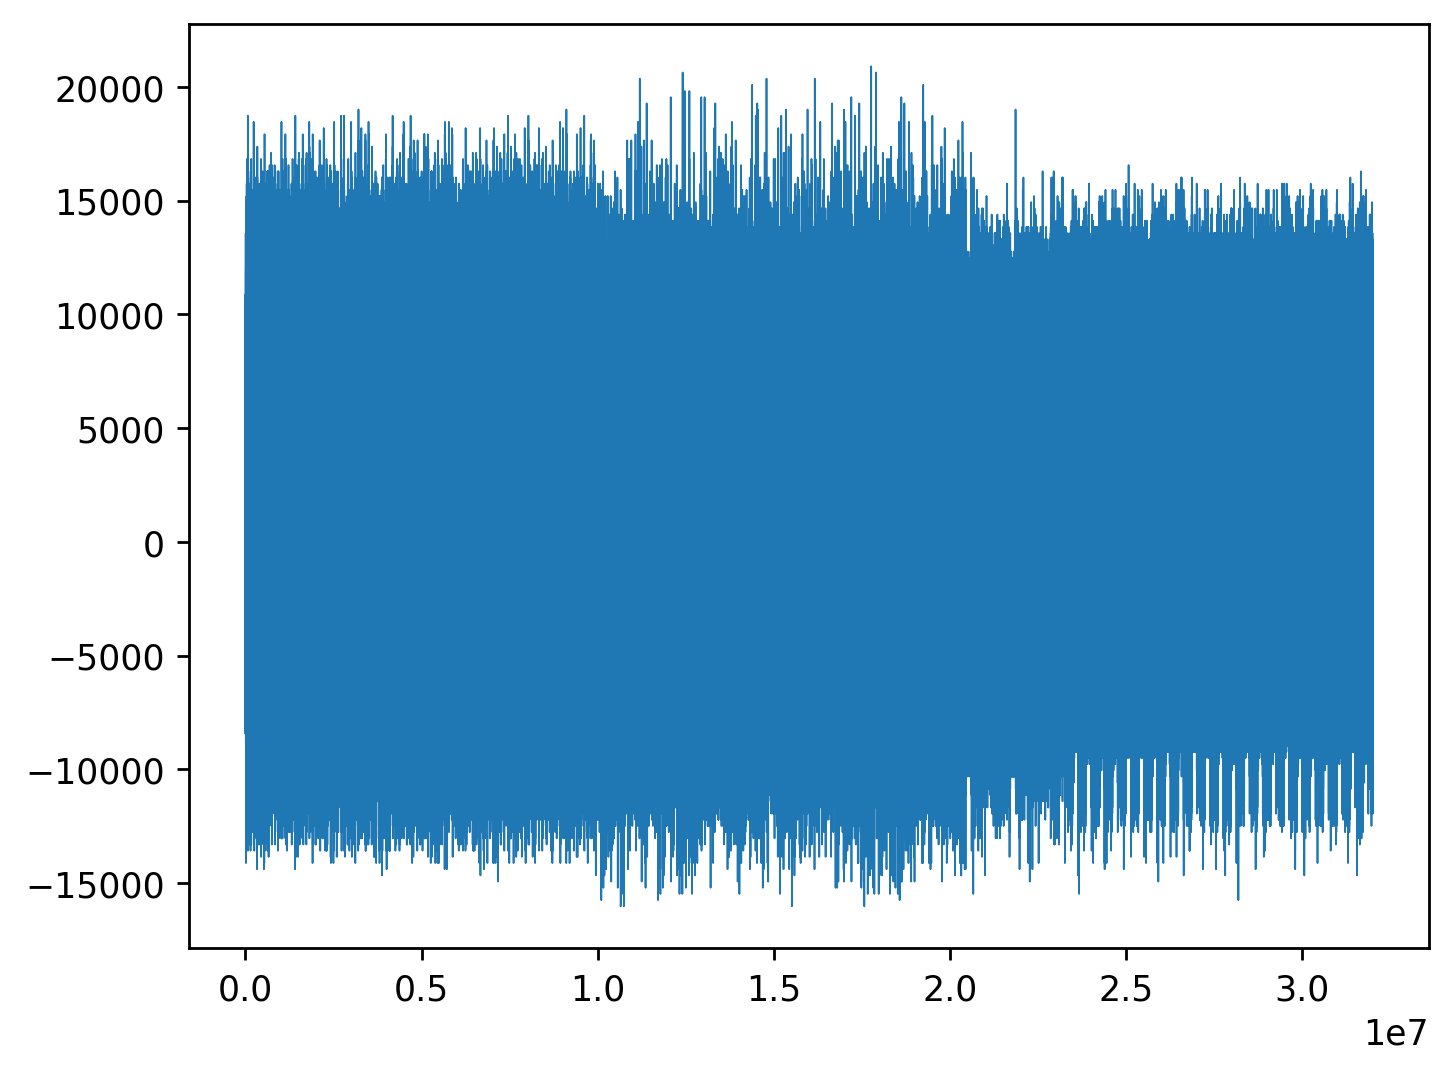

In [10]:
plt.plot(traces_patched[0, :], linewidth=0.5)
plt.show()

In [11]:
trs_folder = "/mnt/jbod_main/public/qsp/trace_copilot/traces/"
trs_file = "nrf52840.ecdsa.O3.patched.32000000.2.chA.trs"
trs_path = trs_folder + trs_file

trigger_trace_patched, _ = get_pico3203D_Trs(trs_path)

cryptoDataCount = 32
sampleLength = 2
sampleCoding = 0
pointNumber = 32000000
traceNumber = 2
traceFile = /mnt/jbod_main/public/qsp/trace_copilot/traces/nrf52840.ecdsa.O3.patched.32000000.2.chA.trs
[#########################                         ] 50% Extract Crypto Data Running...

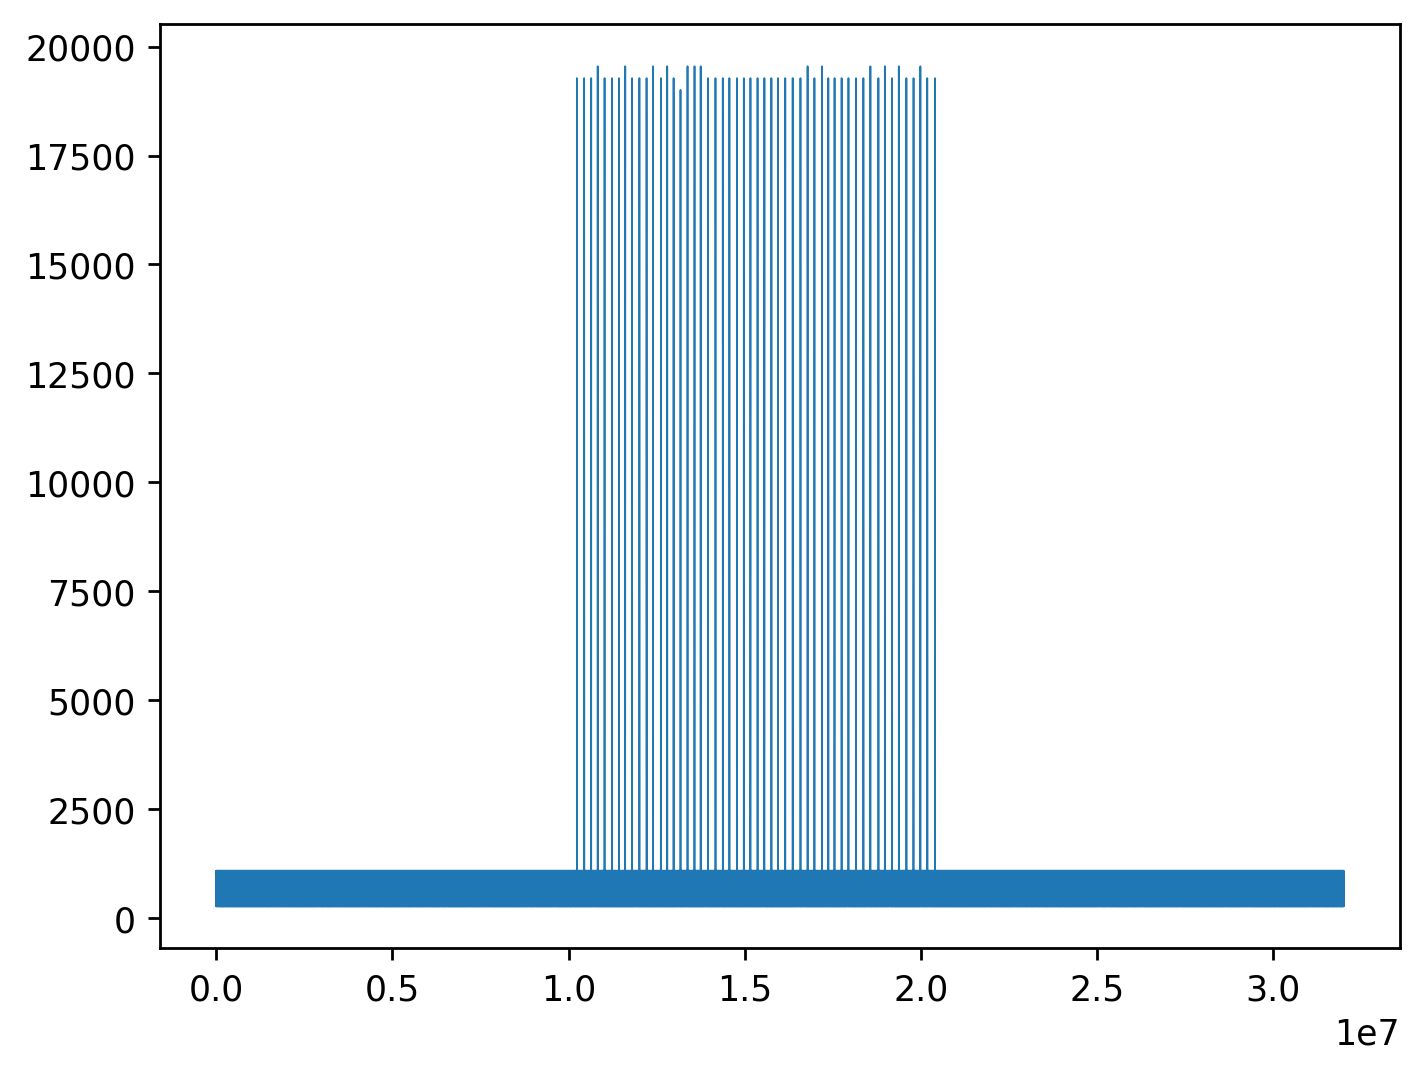

In [12]:
start_patched = 0
end_patched = traces_patched.shape[1]
# DEBUG
trigger_trace_patched_local = trigger_trace_patched[0, start_patched:end_patched]
plt.plot(trigger_trace_patched_local, linewidth=0.5)
plt.show()

In [13]:
def plot_spectrom(channel_data, fs, low_pass_freq = None, nperseg=512, save_prefix=None, ass=None):
    # times = data[0, :]
    # channel_data = data[2, :]
    # Set up the parameters for the spectrogram
    # FIXME: 1e6 for us
    # fs = int(1/(times[1]-times[0])) * (1e6)  # Sampling frequency (Hz)
    # nperseg = 512  # Number of points in each segment
    noverlap = nperseg // 2  # Overlap between segments
    window = signal.windows.hann(nperseg)  # Window function

    
    if low_pass_freq is not None:
        # low pass filter
        nyquist_freq = fs / 2  # Nyquist frequency
        cutoff_freq = low_pass_freq  # Cutoff frequency (Hz)
        b, a = signal.butter(4, cutoff_freq/nyquist_freq, 'low')  # Generate filter coefficients
        filtered_channel_data = signal.lfilter(b, a, channel_data)

        # Calculate the spectrogram using Scipy
        f, t, Sxx = signal.spectrogram(filtered_channel_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
    else:
        # Calculate the spectrogram using Scipy
        f, t, Sxx = signal.spectrogram(channel_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

    if ass is None:
        ass = 1/2

    figsize = plt.figaspect(ass)
    # fig, ax = plt.subplots(figsize=figsize)
    fig, ax = plt.subplots()

    # Plot the spectrogram
    ax.pcolormesh(t, f, 10*np.log10(Sxx))

    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('Time (s)')
    ax.set_title('Channel Spectrogram')
    if save_prefix is not None:
        plt.savefig(save_prefix+"-freqmap.png")
    plt.show()

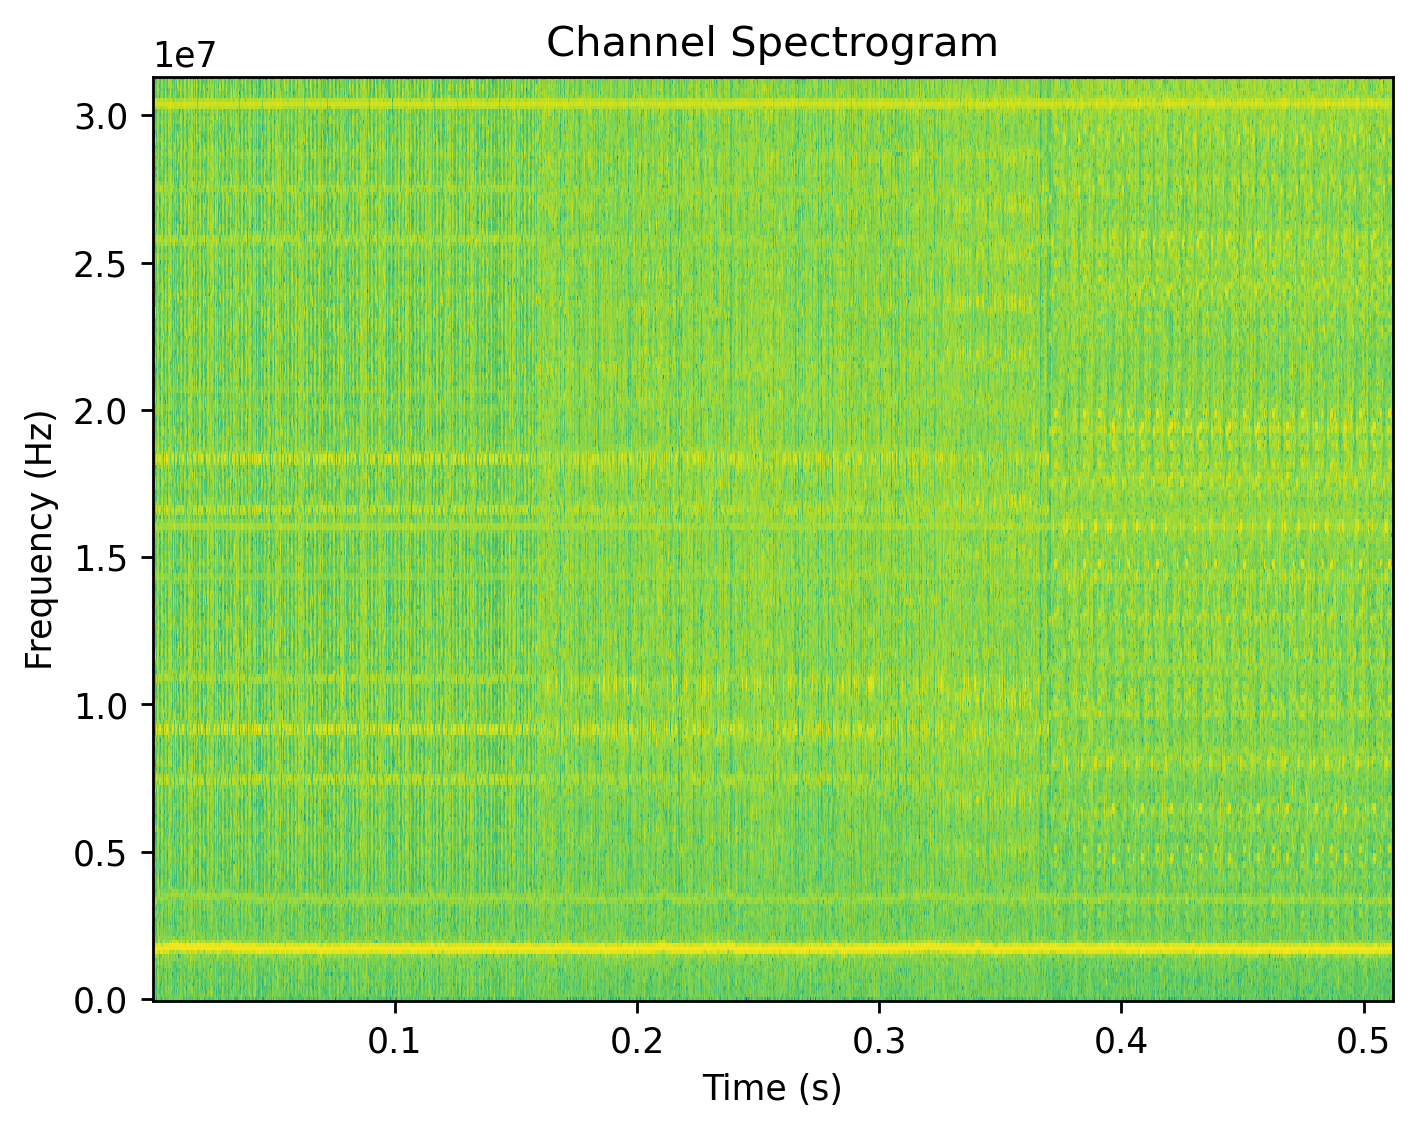

In [14]:
plot_spectrom(channel_data=traces_patched[0, start_patched:end_patched], fs=int(1/sample_interval), nperseg=512, save_prefix="instrumented-trace", ass=1/2) 
# plot_spectrom(channel_data=traces_patched[0, start_patched:end_patched], fs=int(1/sample_interval), nperseg=512, ass=1/2) 

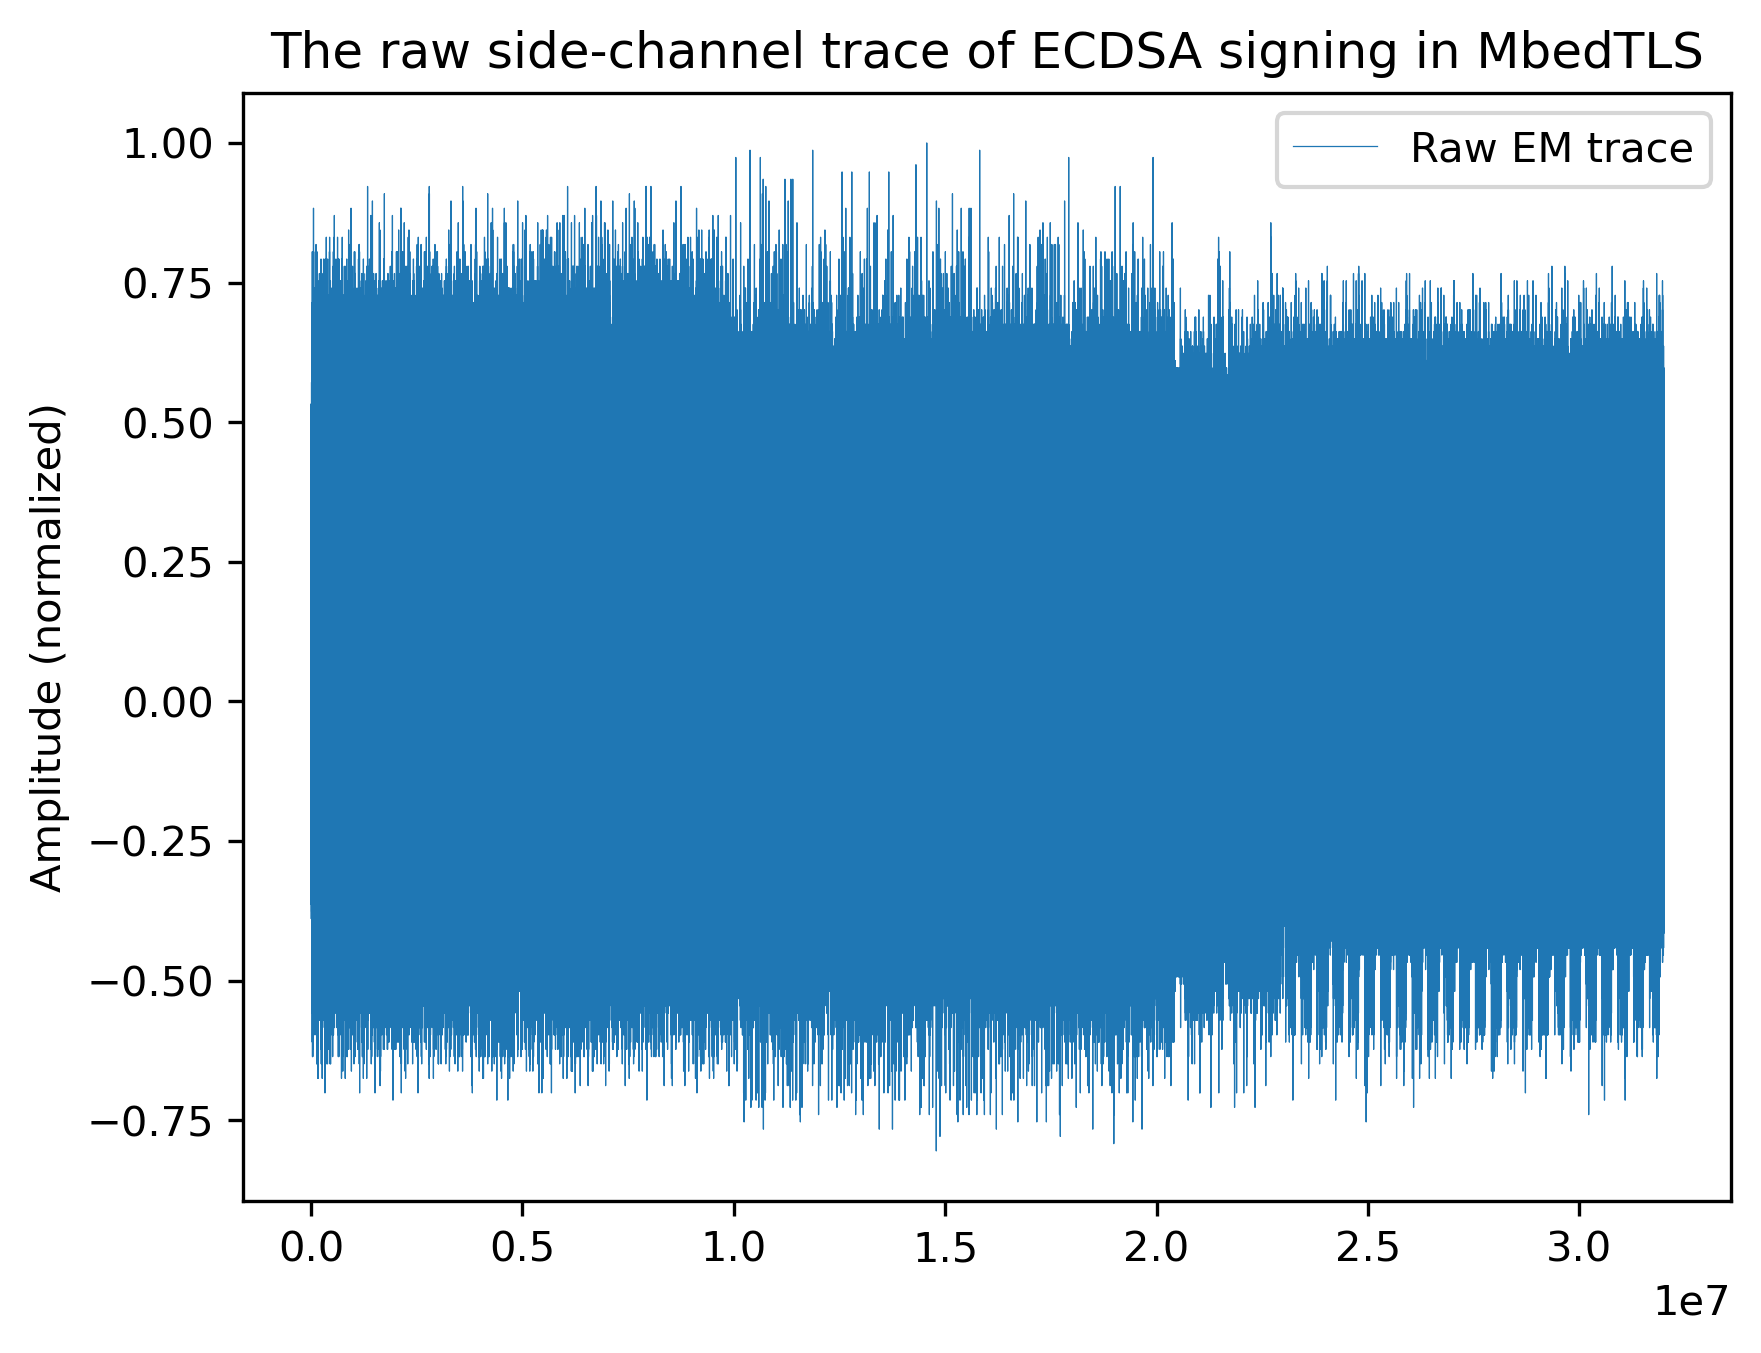

In [36]:
# plot figures for paper


import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

def draw_in_one(trace, trace_trigger, similar_score, save_prefix=None):
    ass = 1/3
    figsize = plt.figaspect(ass)
    fig, ax = plt.subplots(figsize=figsize)
    # fig, ax = plt.subplots(figsize)
    ax.plot(trace/np.max(trace), linewidth=0.1)
    ax.plot((trace_trigger/np.max(trace_trigger)*2-1), linewidth=0.1, color='red')
    # ax.plot(similar_score/np.max(similar_score)-.05, linewidth=0.1, color='green')
    # ax.plot(similar_score, linewidth=0.1, color='green')

    ax.set_ylabel("Amplitude (normalized)")
    ax.set_title("Raw trace and ground truth trigger collected from the target device")
    ax.legend(["EM trace", "Ground truth location of the CO"])
    if save_prefix is not None:
        plt.savefig(save_prefix+"2in1.png")
    plt.show()

# draw_in_one(traces_patched[0,:], trigger_trace_patched[0,:], None, save_prefix="ecdsa-raw-trace-")
# draw_in_one(traces_ori[0,:], trigger_trace_ori[0,:], None, save_prefix="ecdsa-raw-trace-")

# draw_in_one(traces_ori[0,:], trigger_trace_ori[0,:], None)

# ass = 1/1.5
# figsize = plt.figaspect(ass)


fig, ax = plt.subplots()
ax.plot(traces_ori[0,:]/np.max(traces_ori[0,:]), linewidth=0.3)
ax.set_ylabel("Amplitude (normalized)")
ax.set_title("The raw side-channel trace of ECDSA signing in MbedTLS")
ax.legend(["Raw EM trace"])
plt.savefig("raw-target-trace-ecdsa-only.png")
plt.show()

In [14]:
# # plot figures for paper

# start = 0 # 4_000 #  // len(traces_patched[0, :]) 
# end = start + 100_000

# axis_font = 8

# plt.plot(traces_patched[0, start:end]*2, linewidth=0.1, color='b')
# plt.xlabel('Time (ns)')


# plt.plot((trigger_trace_patched[0, start:end]-10000)*3.5, linewidth=0.3, color='r')

# plt.legend(["EM side-channel trace", 'Marker signal'], loc=1, prop={'size': 7})
# frame1 = plt.gca()

# frame1.xaxis.label.set_size(axis_font)
# frame1.axes.yaxis.set_ticklabels([])

# # ## spectrum plot start
# # sample_interval = 2e-9 # 2ns
# # fs = int(1/sample_interval)
# # channel_data=traces_patched[0, start:end]
# # low_pass_freq=0.5e8
# # nperseg = 512  # Number of points in each segment
# # noverlap = nperseg // 2  # Overlap between segments
# # window = signal.windows.hann(nperseg)  # Window function


# # if low_pass_freq is not None:
# #     # low pass filter
# #     nyquist_freq = fs / 2  # Nyquist frequency
# #     cutoff_freq = low_pass_freq  # Cutoff frequency (Hz)
# #     b, a = signal.butter(4, cutoff_freq/nyquist_freq, 'low')  # Generate filter coefficients
# #     filtered_channel_data = signal.lfilter(b, a, channel_data)

# #     # Calculate the spectrogram using Scipy
# #     f, t, Sxx = signal.spectrogram(filtered_channel_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
# # else:
# #     # Calculate the spectrogram using Scipy
# #     f, t, Sxx = signal.spectrogram(channel_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# # # Plot the spectrogram
# # plt.pcolormesh(t, f, 10*np.log10(Sxx))

# plt.ylabel('Amplitude after normalization.')
# # plt.xlabel('Time (s)')
# plt.title('Side channel traces in time domain')

# # ## spectrum plot end

# # plt.savefig("co-time-domain.svg")
# plt.savefig("co-time-domain.png")
# plt.show()

In [15]:
# # plot figures for paper

# sample_interval = 2e-9 # 2ns
# fs = int(1/sample_interval)
# # SAMPLE_NUM = 500_000
# # plot_spectrom(channel_data=traces_patched[0, start:end], fs=fs, low_pass_freq=0.5e8) 

# channel_data=traces_patched[0, start:end]
# fs=fs
# low_pass_freq = None
# nperseg = 512  # Number of points in each segment
# noverlap = nperseg // 2  # Overlap between segments
# window = signal.windows.hann(nperseg)  # Window function


# if low_pass_freq is not None:
#     # low pass filter
#     nyquist_freq = fs / 2  # Nyquist frequency
#     cutoff_freq = low_pass_freq  # Cutoff frequency (Hz)
#     b, a = signal.butter(4, cutoff_freq/nyquist_freq, 'low')  # Generate filter coefficients
#     filtered_channel_data = signal.lfilter(b, a, channel_data)

#     # Calculate the spectrogram using Scipy
#     f, t, Sxx = signal.spectrogram(filtered_channel_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
# else:
#     # Calculate the spectrogram using Scipy
#     f, t, Sxx = signal.spectrogram(channel_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# # Plot the spectrogram
# plt.pcolormesh(t, f, 10*np.log10(Sxx))

# frame1 = plt.gca()

# axis_font = 8
# plt.xticks(fontsize=axis_font)
# # frame1.axes.yaxis.set_ticklabels([])

# plt.ylabel('Frequency (Hz)')
# plt.xlabel('Time (s)')
# plt.title('Trace spectrogram, FFT length=512 points')

# plt.savefig("co-freq-domain.png")
# plt.show()

[[10235919 10442466 10642788 10826529 11021787 11233013 11429587 11608931
  11803438 12010666 12213918 12400295 12621043 12800600 12981447 13177296
  13376738 13575572 13749987 13958575 14170081 14377460 14565503 14781047
  14975013 15163150 15364736 15559142 15757583 15944211 16151536 16361738
  16582630 16785174 16978992 17192384 17373519 17550728 17751023 17945551
  18159896 18368964 18568130 18795162 18977901 19185086 19374090 19589720
  19792973 19986977 20182232 20400399]
 [10236029 10442576 10642898 10826639 11021898 11233123 11429697 11609041
  11803548 12010776 12214029 12400406 12621154 12800710 12981557 13177406
  13376848 13575682 13750097 13958685 14170191 14377570 14565613 14781157
  14975124 15163260 15364846 15559253 15757693 15944321 16151646 16361848
  16582740 16785285 16979103 17192494 17373629 17550839 17751134 17945662
  18160006 18369074 18568240 18795272 18978011 19185196 19374200 19589831
  19793083 19987087 20182342 20400509]]


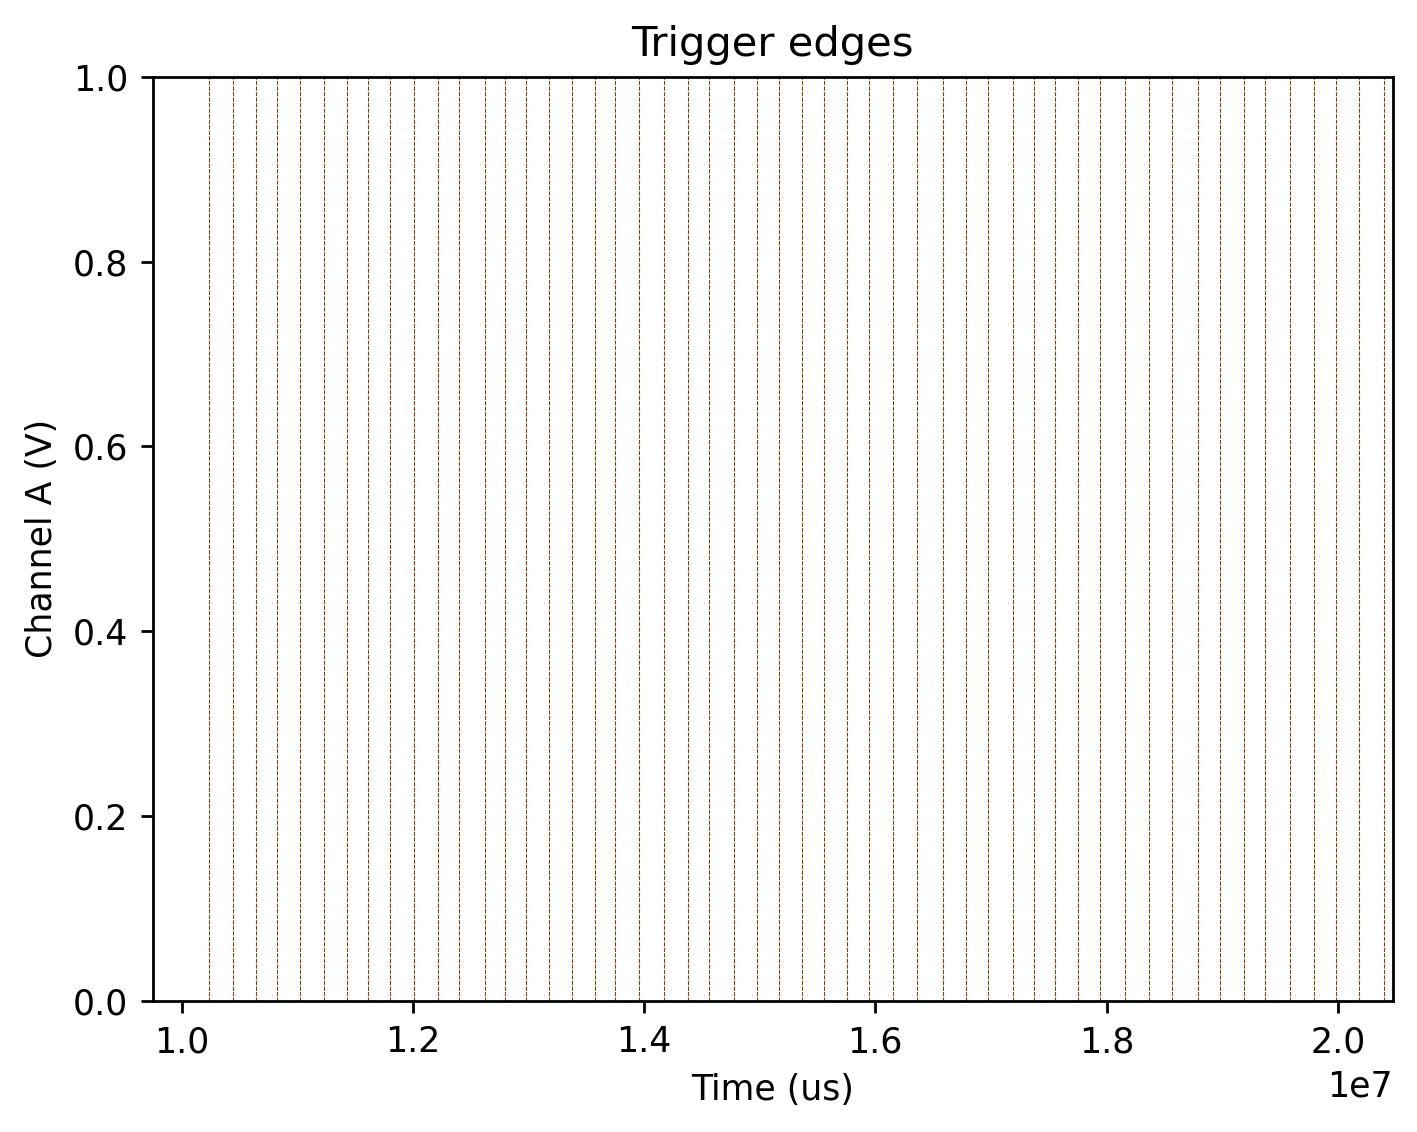

In [16]:
def get_trigger_edges(trigger_trace, threshold = 0.3):
    max_scale = np.max(trigger_trace)
    rising_edges = []
    falling_edges = []
    INT_RAISE_CYCLES = 16
    INT_FALL_CYCLES = 12
    MAX_IDX = len(trigger_trace)
    mode = 0 # 0 for rising, 1 for falling
    for i,v in enumerate(trigger_trace):
        if mode == 0 and v > threshold * max_scale:
            mode = 1
            rising_edges.append(max(0, i-INT_RAISE_CYCLES))
            continue
        elif mode == 1 and v < threshold * max_scale:
            mode = 0
            falling_edges.append(min(MAX_IDX, i + INT_FALL_CYCLES))
            continue
    return np.array([rising_edges, falling_edges])

# trigger_edges = get_trigger_edges(trigger_trace_patched[0, :])
trigger_edges = get_trigger_edges(trigger_trace_patched_local)

print(trigger_edges)

# plt.plot(data[0, :], data[1, :], linewidth=0.5)
for edges in trigger_edges[0, :]:
    plt.axvline(x=edges, color='r', linestyle='--', linewidth=0.3)
for edges in trigger_edges[1, :]:
    plt.axvline(x=edges, color='g', linestyle=':', linewidth=0.3)

plt.xlabel('Time (us)')
plt.ylabel('Channel A (V)')
plt.title('Trigger edges')
plt.show()

In [17]:
def remove_trigger_segs(data, trigger_edges):
    trace_output = []
    x = 0
    y = 0
    for i,d in enumerate(data):
        if x>= trigger_edges.shape[1]:
            # no edges remain
            trace_output.append(d)
        elif y == 0:
            if i<trigger_edges[y][x]:
                trace_output.append(d)
            else:
                y = 1
        else:
            if i>trigger_edges[y][x]:
                x += 1
                y = 0

    return np.array(trace_output)

# plot figures for paper: after removal
# trace_without_triggers = remove_trigger_segs(traces_patched[0, :], trigger_edges)

# plt.plot(trace_without_triggers[:], linewidth=0.3)
# plt.plot(traces_ori[0, :], linewidth=0.3)
# plt.show()
# sample_interval = 2e-9 # 2ns
# plot_spectrom(channel_data=trace_without_triggers[:], fs=int(1/sample_interval)) 

/tmp/ipykernel_197041/2943036094.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


(32000000,)
[[10235919 10442466 10642788 10826529 11021787 11233013 11429587 11608931
  11803438 12010666 12213918 12400295 12621043 12800600 12981447 13177296
  13376738 13575572 13749987 13958575 14170081 14377460 14565503 14781047
  14975013 15163150 15364736 15559142 15757583 15944211 16151536 16361738
  16582630 16785174 16978992 17192384 17373519 17550728 17751023 17945551
  18159896 18368964 18568130 18795162 18977901 19185086 19374090 19589720
  19792973 19986977 20182232 20400399]
 [10236029 10442576 10642898 10826639 11021898 11233123 11429697 11609041
  11803548 12010776 12214029 12400406 12621154 12800710 12981557 13177406
  13376848 13575682 13750097 13958685 14170191 14377570 14565613 14781157
  14975124 15163260 15364846 15559253 15757693 15944321 16151646 16361848
  16582740 16785285 16979103 17192494 17373629 17550839 17751134 17945662
  18160006 18369074 18568240 18795272 18978011 19185196 19374200 19589831
  19793083 19987087 20182342 20400509]]
avg width: 199193


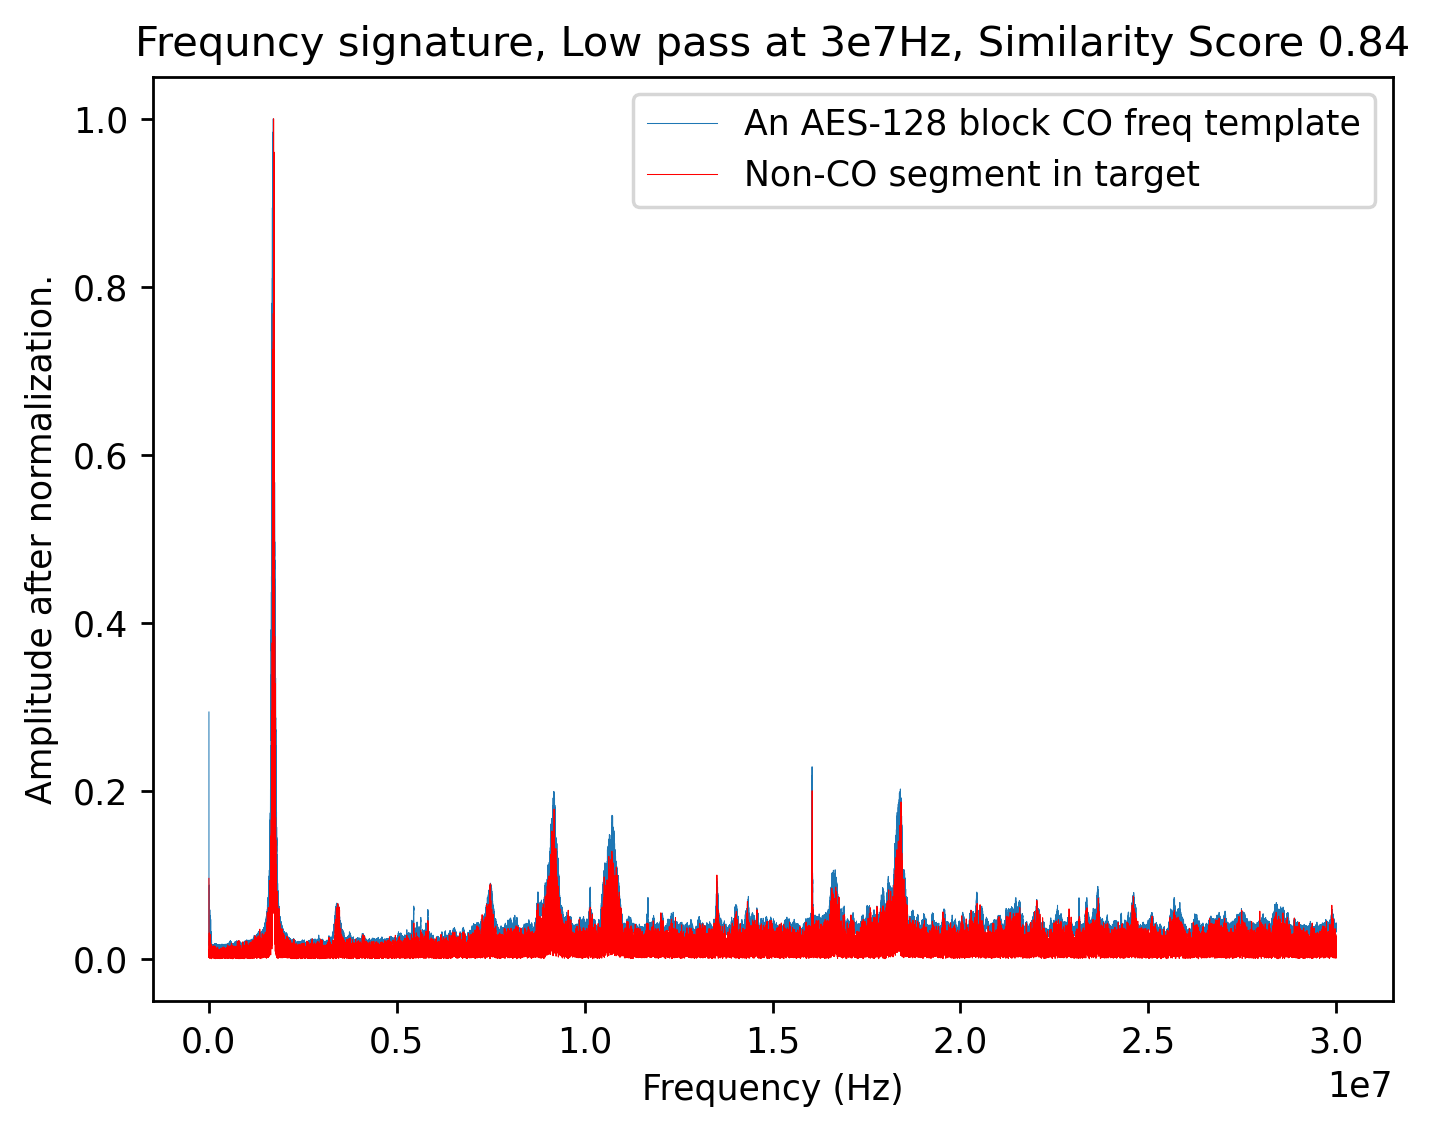

100%|██████████| 6361/6361 [03:24<00:00, 31.18it/s]


In [54]:
from scipy.fft import fft, fftfreq
from scipy.stats.stats import pearsonr
from tqdm import tqdm

def similar_index_freq(x1, y1, x2, y2):
    # make sure x1 is longer
    if len(x1)<len(x2):
        x1, y1, x2, y2 = x2, y2, x1, y1
    y2_new = np.interp(x1*(x2[-1]/x1[-1]), x2, y2)
    score, pvalue = pearsonr(y1, y2_new)
    return score

def similar_index_freq_sad(x1, y1, x2, y2):
    # make sure x1 is longer
    if len(x1)<len(x2):
        x1, y1, x2, y2 = x2, y2, x1, y1
    y2_new = np.interp(x1*(x2[-1]/x1[-1]), x2, y2)
    score = np.sum(np.abs(y1-y2_new)/len(x1))
    return score

def similar_index_time(x1, y1, x2, y2):
    # make sure x1 is longer
    if len(x1)<len(x2):
        x1, y1, x2, y2 = x2, y2, x1, y1
    y2_new = np.interp(x1*(x2[-1]/x1[-1]), x2, y2)
    score, pvalue = pearsonr(y1, y2_new)
    return score

def avg_interp_template(xdatas, y_datas:list):
    min_len = np.min([len(y) for y in y_datas])
    max_len = np.max([len(y) for y in y_datas])
    max_x_id = np.argmax([len(y) for y in y_datas])
    x_new = xdatas[max_x_id]
    template = np.zeros((len(y_datas), max_len))

    for i, y in enumerate(y_datas):
        x = xdatas[i]
        y_new = np.interp(x_new*(x[-1]/x_new[-1]) , x, y)
        template[i,:] = y_new
    average_template = np.mean(template, axis=0)
    # average_template = average_template[average_template != 0]
    return x_new, average_template

def calc_freq(seg_data, fs, low_pass_freq=None):
    N = len(seg_data)
    yf = fft(seg_data)
    # yf = 10*np.log10(yf) # log?
    xf = fftfreq(N, 1/fs)[:N//2]
    if low_pass_freq is not None and np.max(xf) >= low_pass_freq:
        cut_pos = np.argmax(xf >= low_pass_freq)
        xf = xf[0:cut_pos]
    # return xf, 2.0/N * np.abs(yf[0:len(xf)])
    return xf, np.abs(yf[0:len(xf)])


    # # periodogram
    # xf, yf = signal.periodogram(seg_data, fs)
    # if low_pass_freq is not None:
    #     cut_pos = np.argmax(xf >= low_pass_freq)
    #     xf = xf[0:cut_pos]
    # return  xf, yf[0:len(xf)]

def extract_freq_feature(trace_patched, trigger_edges, fs, low_pass_freq = None, nperseg = 512, match_stride = 50):
    '''
        nperseg = 512  # Number of points in each segment
        noverlap = nperseg // 2  # Overlap between segments
        window = signal.windows.hann(nperseg)  # Window function
    '''
    trace_output = []
    # debug
    idx = 0
    legends = []
    # start=0
    # num = len(trigger_edges[0,:]) # 10
    last_pos = trigger_edges[1, 0] # first right
    widths = []
    xdatas_time = []
    ydatas_time = []
    xdatas_freq = []
    ydatas_freq = []
    template = []
    for left, right in zip(trigger_edges[0, 1:], trigger_edges[1, 1:]):
        # print(left-last_pos)
        assert left-last_pos > nperseg
        seg_data = trace_patched[last_pos:left]
        # print(f"seg: {last_pos}-{left}")
        # print(f"width {left-last_pos}")
        widths.append(left-last_pos)
        ### get freq map
        # noverlap = nperseg // 2  # Overlap between segments
        # window = signal.windows.hann(nperseg)  # Window function
        # if low_pass_freq is not None:
        #     # low pass filter
        #     nyquist_freq = fs / 2  # Nyquist frequency
        #     cutoff_freq = low_pass_freq  # Cutoff frequency (Hz)
        #     b, a = signal.butter(4, cutoff_freq/nyquist_freq, 'low')  # Generate filter coefficients
        #     filtered_seg_data = signal.lfilter(b, a, seg_data)

        #     # Calculate the spectrogram using Scipy
        #     f, t, Sxx = signal.spectrogram(filtered_seg_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
        # else:
        #     # Calculate the spectrogram using Scipy
        #     f, t, Sxx = signal.spectrogram(seg_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

        # Debug: Plot the spectrogram
        # plt.pcolormesh(t, f, 10*np.log10(Sxx))
        # # plt.pcolormesh(t, f, Sxx)
        # print(Sxx.shape)
        # plt.ylabel('Frequency (Hz)')
        # plt.xlabel('Time (s)')
        # plt.title('Channel Spectrogram')

        # debug: plot trace
        # plt.plot(np.arange(0, left-last_pos), seg_data, linewidth = 0.1)


        # debug 
        if idx > 0:
            # freq features
            # print(seg_data)
            xf, yf = calc_freq(seg_data, fs, low_pass_freq)
            xdatas_freq.append(np.abs(xf))
            ydatas_freq.append(np.abs(yf))
            # time features
            xdatas_time.append(np.arange(0, left-last_pos))
            ydatas_time.append(seg_data)
            # plt.plot(xf,  np.abs(yf), linewidth = 0.3)
            # legends.append(str(idx))
        idx+=1

        # update last pos
        last_pos = right
    

    # debug, compare_col
    avg_width = int(np.mean(widths))
    print(f"avg width: {avg_width}")

    # get the template
    x_new_freq, template_freq = avg_interp_template(xdatas_freq, ydatas_freq)
    x_new_time, template_time = avg_interp_template(xdatas_time, ydatas_time)


    # # get time domain score
    # # score_time = similar_index_time(x_new_time, template_time, xt, yt)
    # x1, y1, x2, y2 = xdatas_time[1], ydatas_time[1], xdatas_time[-2], ydatas_time[-2]
    # if len(x1)<len(x2):
    #     x1, y1, x2, y2 = x2, y2, x1, y1
    # y2_new = np.interp(x1*(x2[-1]/x1[-1]), x2, y2)
    # score, pvalue = pearsonr(y1, y2_new)
    # score_time = score
    # print(f"!!! socre time: {score_time}")
    # # plt.plot(x1, y1, linewidth = 0.1)
    # plt.plot(x2, y2+10000, linewidth = 0.1)
    # print(y2_new[-100:])
    # plt.plot(x1, y2_new, linewidth = 0.1)
    # plt.title(f"template time")
    # plt.show()

    

    # comp_start = 10000 # 35037 + 150 # 10000 # 35037 + 150 # this is for tinyaes figures in the paper
    # comp_start = 10229708  # long trace mating
    comp_start = 10642898    # long trace mating
    # seg_data = traces_ori[0, comp_start:comp_start+avg_width]
    seg_data = trace_patched[comp_start:comp_start+avg_width]
    xf, yf = calc_freq(seg_data, fs, low_pass_freq)

    # # get time domain score
    # xt = np.arange(x_new_time[0], x_new_time[0]+avg_width) # note the start pos should be same as new time
    # yt = seg_data
    # score_time = similar_index_time(x_new_time, template_time, xt, yt)
    # print(f"!!! socre time: {score_time}")

    # plot template
    plt.plot(x_new_freq, template_freq / np.max(np.abs(template_freq)), linewidth = 0.3)
    legends.append('An AES-128 block CO freq template')
    # plot target
    plt.plot(xf, np.abs(yf) / np.max(np.abs(yf)), linewidth = 0.3, color='r')
    legends.append('Non-CO segment in target')
    idx+=1

    plt.title("Frequncy signature, Low pass at 3e7Hz, Similarity Score %.2f" % (similar_index_freq(x_new_freq, template_freq, xf, yf)))
    plt.legend(legends)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel('Amplitude after normalization.')
    # plt.savefig("template-compare-notmatch.png")
    plt.show()

    # global similar_result
    # return similar_result

    similar_result = []

    # for i in tqdm(range(0, trace_patched.shape[0]-avg_width, match_stride)):
    #     comp_start = i
    #     seg_data = trace_patched[comp_start:comp_start+avg_width]
    #     # seg_data = trace_patched[comp_start:comp_start+avg_width]

    for i in tqdm(range(0, traces_ori.shape[1]-avg_width, match_stride)):
        comp_start = i
        seg_data = traces_ori[0, comp_start:comp_start+avg_width]
        # seg_data = trace_patched[comp_start:comp_start+avg_width]

        # get freq domain template
        xf, yf = calc_freq(seg_data, fs, low_pass_freq)

        score_freq = similar_index_freq(x_new_freq[int(len(x_new_freq)*0.7):], template_freq[int(len(template_freq)*0.7):], xf[int(len(xf)*0.7):], yf[int(len(yf)*0.7):])
        # score_freq = similar_index_freq(x_new_freq, template_freq, xf, yf)
        # score_freq = similar_index_freq_sad(x_new_freq, template_freq, xf, yf)
        similar_result.append(score_freq)

        # get time domain template
        # xt = np.arange(x_new_time[0], x_new_time[0]+avg_width) # note the start pos should be same as new time
        # yt = seg_data
        # score_time = similar_index_time(x_new_time, template_time, xt, yt)
        # similar_result.append(score_time)

    return similar_result

traces_patched_local = traces_patched[0, start_patched:end_patched]

print(traces_patched_local.shape)
# extract_freq_feature(traces_patched_local, trigger_edges, fs=fs)|
# compare_col = np.array([100_000, 100_000+700])
# compare_col = np.array([0, 52265])
# debug_edges = np.append(trigger_edges, compare_col.reshape(-1, 1), axis=1)
print(trigger_edges)

match_stride = 5000 # 1000
similar_result = extract_freq_feature(traces_patched_local, trigger_edges, fs=fs, low_pass_freq=3e7, match_stride=match_stride)

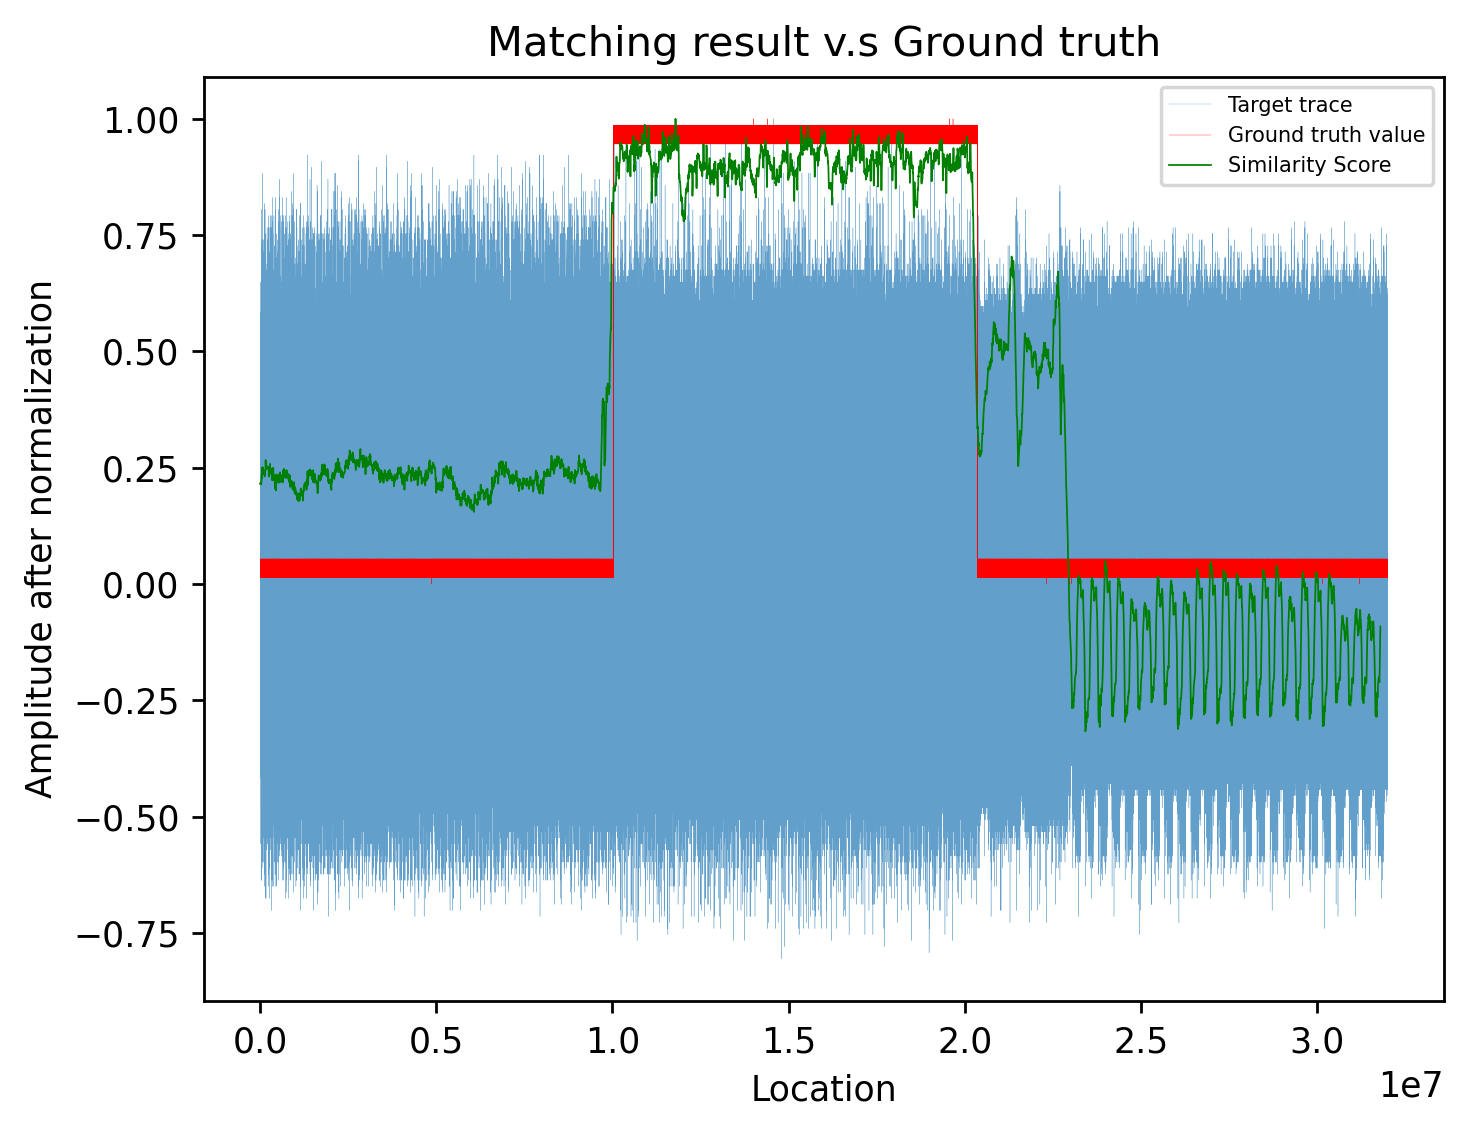

In [55]:
# prepare match result figures for long trace

# length = len(traces_ori[0, :]) # 340_000
ass = 1/2

figsize = plt.figaspect(ass)
# fig, ax = plt.subplots(figsize=figsize)
fig, ax = plt.subplots()

traces_ori_points = np.array(range(0, len(traces_ori[0, :])))
ax.plot(traces_ori_points, traces_ori[0, :]/np.max(traces_ori[0, :]), linewidth=0.1, alpha=0.7)

# traces_ori_points = np.array(range(start_ori, end_ori))
# ax.plot(traces_ori_points, traces_ori[0, start_ori:end_ori]/np.max(traces_ori[0, start_ori:end_ori]), linewidth=0.1)
# ax.plot(traces_ori[0, :], linewidth=0.1)
# ax.set_title('Unknown side channel trace (zoom in)')
# ax.ylabel('Similarity Score')
# ax.set_xlabel('Location')

# figsize = plt.figaspect(ass)
# # fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

ax.plot(traces_ori_points, trigger_trace_ori[0, :]/np.max(trigger_trace_ori[0, :]), linewidth=0.1, color='red')

# ax.plot(traces_ori_points, trigger_trace_ori[0, start_ori:end_ori]/np.max(trigger_trace_ori[0, start_ori:end_ori]), linewidth=0.1, color='red')

# ax.plot(similar_result[:], linewidth=0.1, color='green')
# ax.set_title('Ground truth location (zoom in)')
# ax.ylabel('Similarity Score')
# ax.set_xlabel('Location')


# # plt.savefig("ground-truth-long-zoomin.png")
# plt.show()

# plt.savefig("unknown-trace-long-zoomin.png")
# plt.show()


# figsize = plt.figaspect(ass)
# # fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

similar_result_points = np.array(range(0, len(similar_result[:])))*match_stride
ax.plot(similar_result_points, similar_result[:]/np.max(similar_result[:]), linewidth=0.5, color='green')
# ax.plot(similar_result_points, similar_result[:], linewidth=0.3, color='green')

# similar_result_points = np.array(range(start_ori//match_stride, end_ori//match_stride))*match_stride
# ax.plot(similar_result_points, similar_result[start_ori//match_stride:end_ori//match_stride]/np.max(similar_result[start_ori//match_stride:end_ori//match_stride]), linewidth=0.3, color='green')

# ax.plot(similar_result[:], linewidth=0.1, color='green')
ax.set_title('Matching result v.s Ground truth')
ax.set_ylabel('Amplitude after normalization')
ax.set_xlabel('Location')
ax.legend([
        "Target trace", 
        "Ground truth value",
        "Similarity Score",
    ],
    prop={'size': 6}
)

# similar_result_range = list(range(start_ori//match_stride, end_ori//match_stride))
# similar_result_range_interp = list(range(start_ori, end_ori))
# similar_result_interp =  np.interp(similar_result_range_interp, similar_result_range, similar_result[start_ori//match_stride:end_ori//match_stride])
# ax.plot(similar_result_interp, linewidth=0.1, color='green')

plt.savefig("ecdsa-sign-bandfreq-match-result-vs-groundtruth-long-large.png")
# plt.savefig("ecdsa-sign-lowfreq-match-result-vs-groundtruth-long-large.png")
# plt.savefig("ecdsa-sign-sad-match-result-vs-groundtruth-long-large.png")
# plt.savefig("match-result-vs-groundtruth-long-zoomin.png")
plt.show()

In [22]:
np.min(similar_result)

-0.05338914163793112

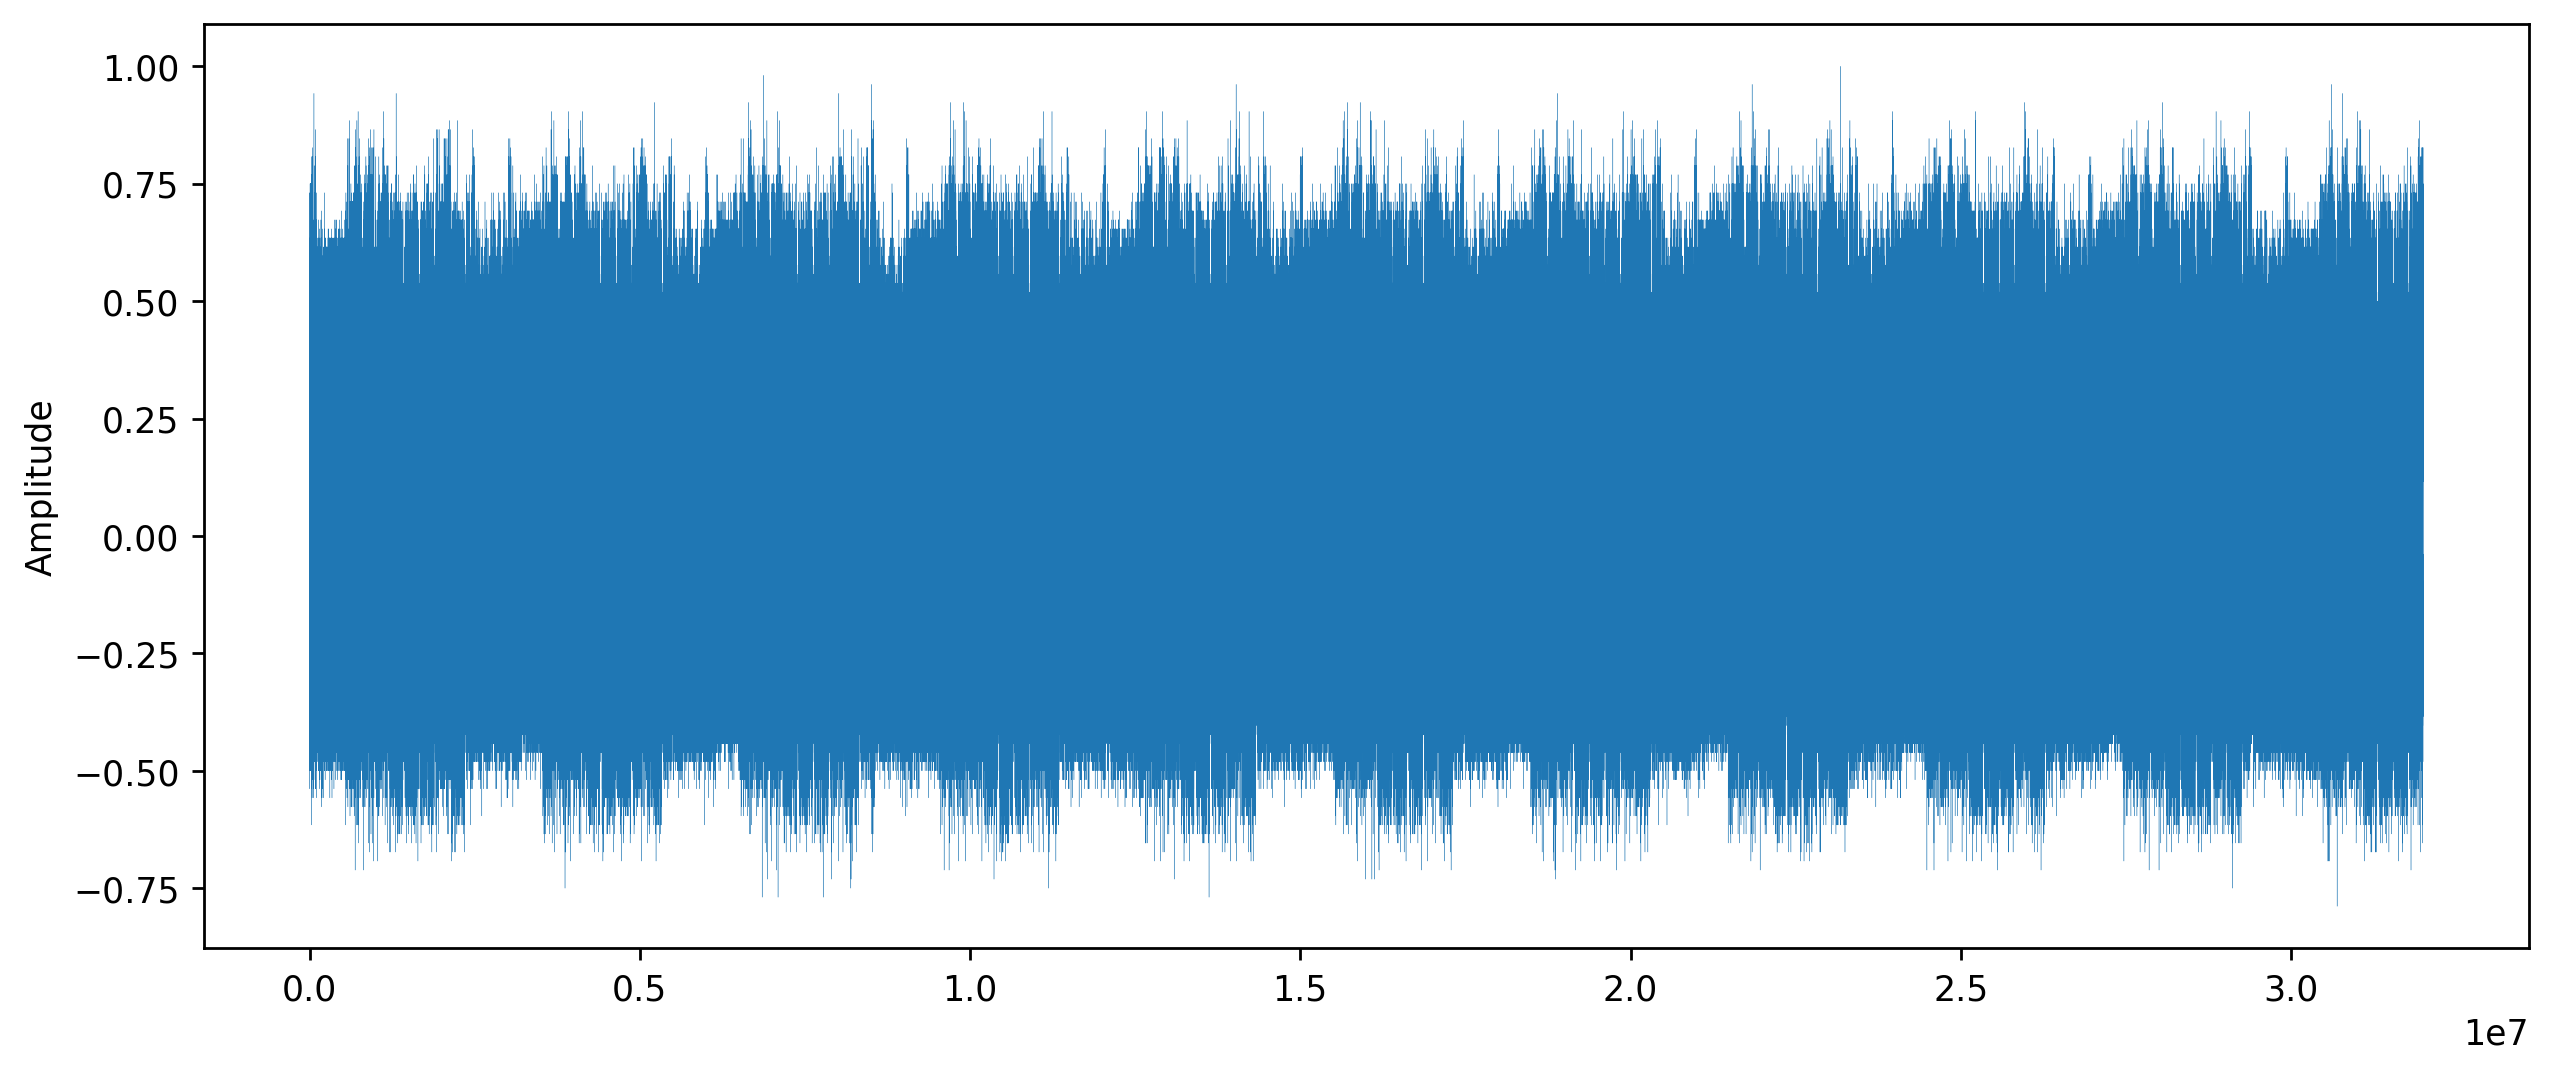

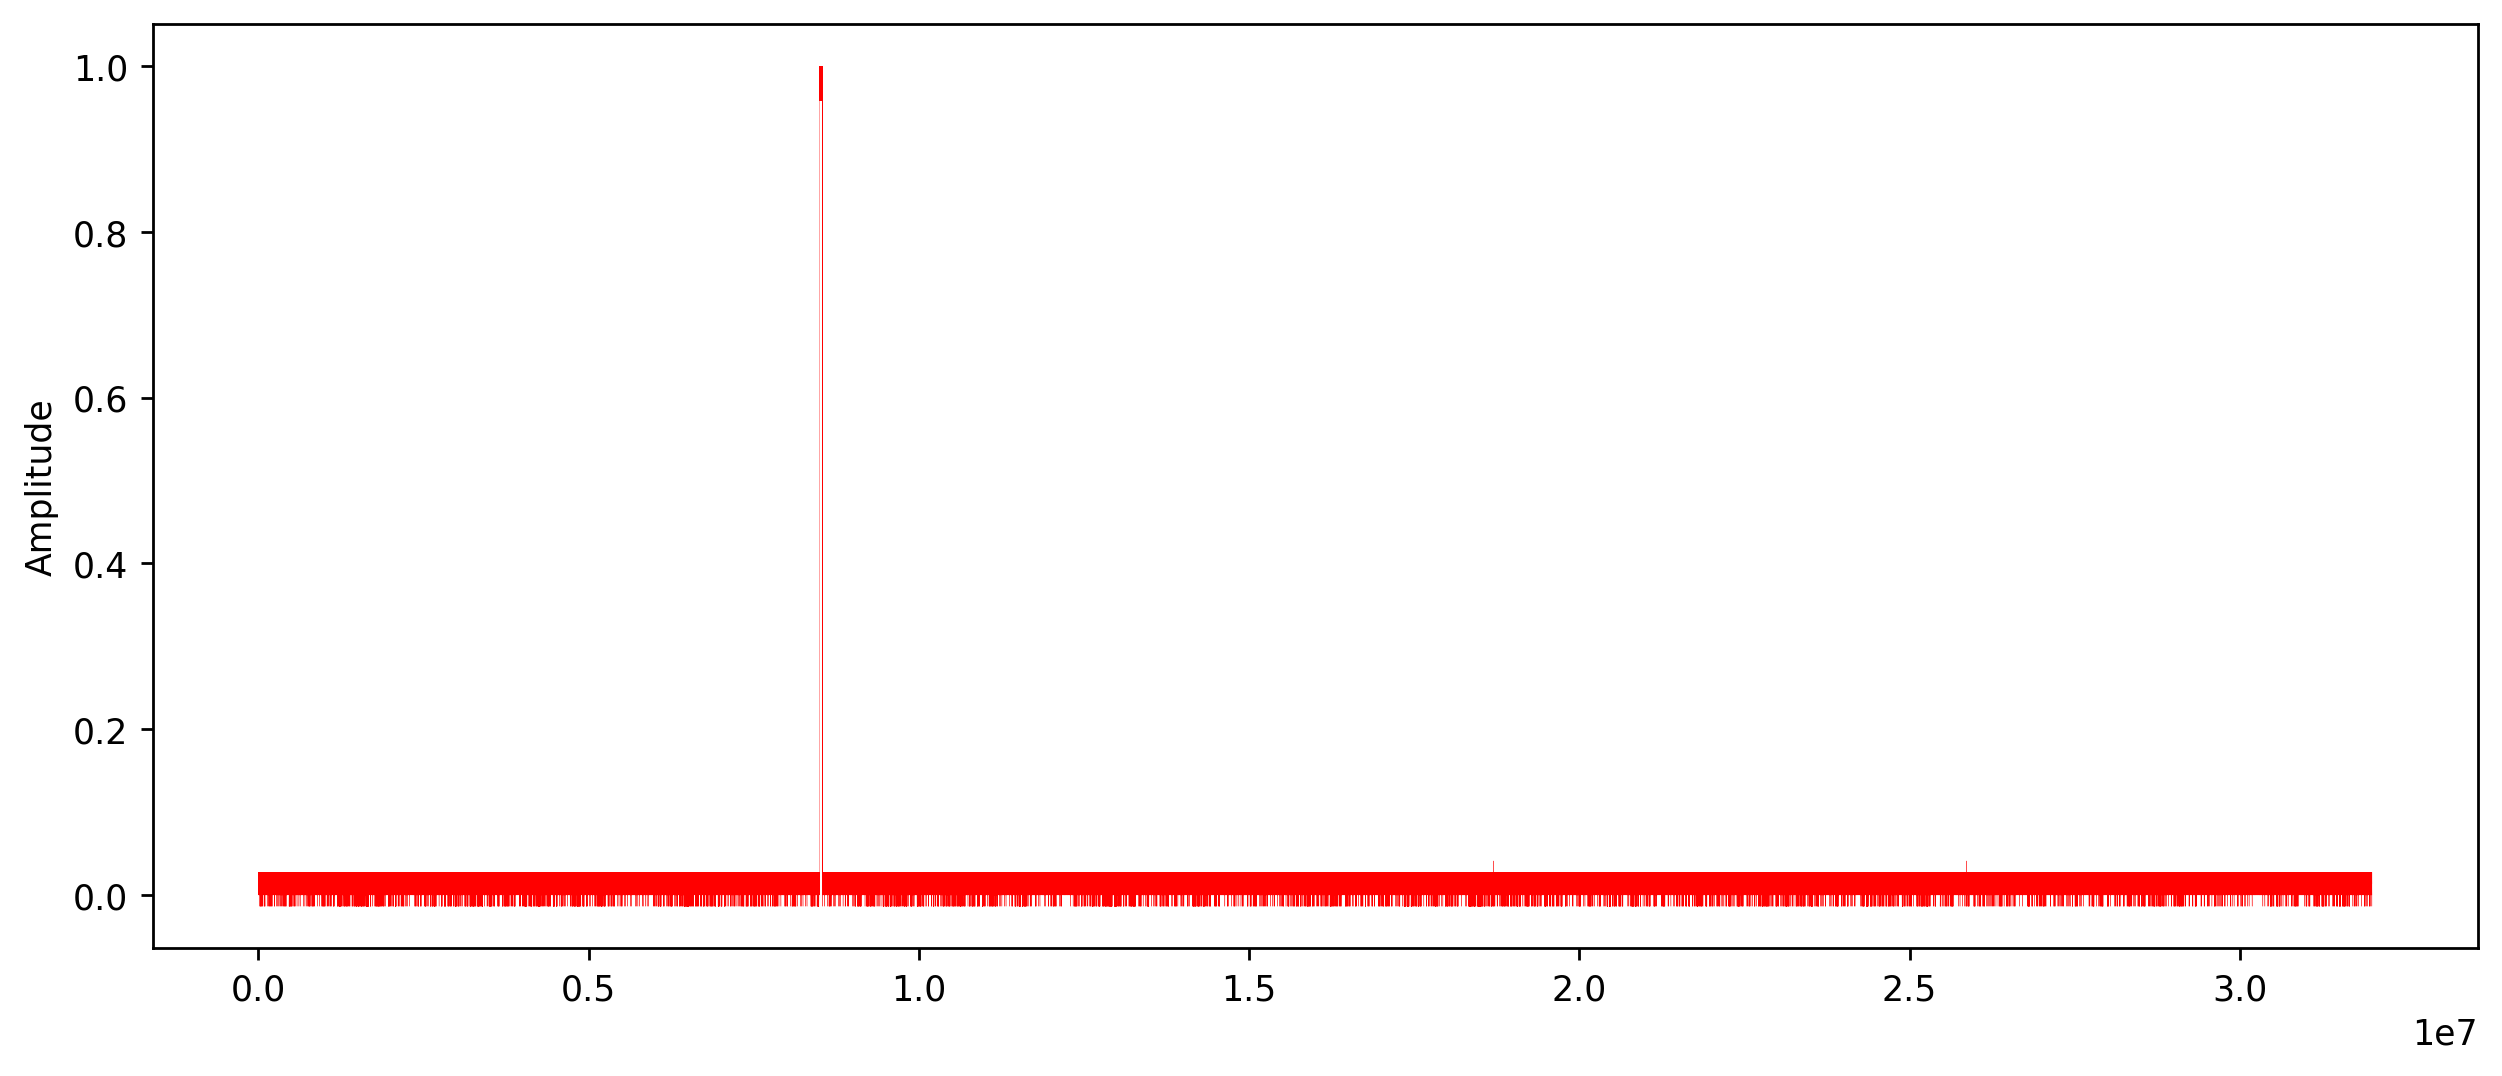

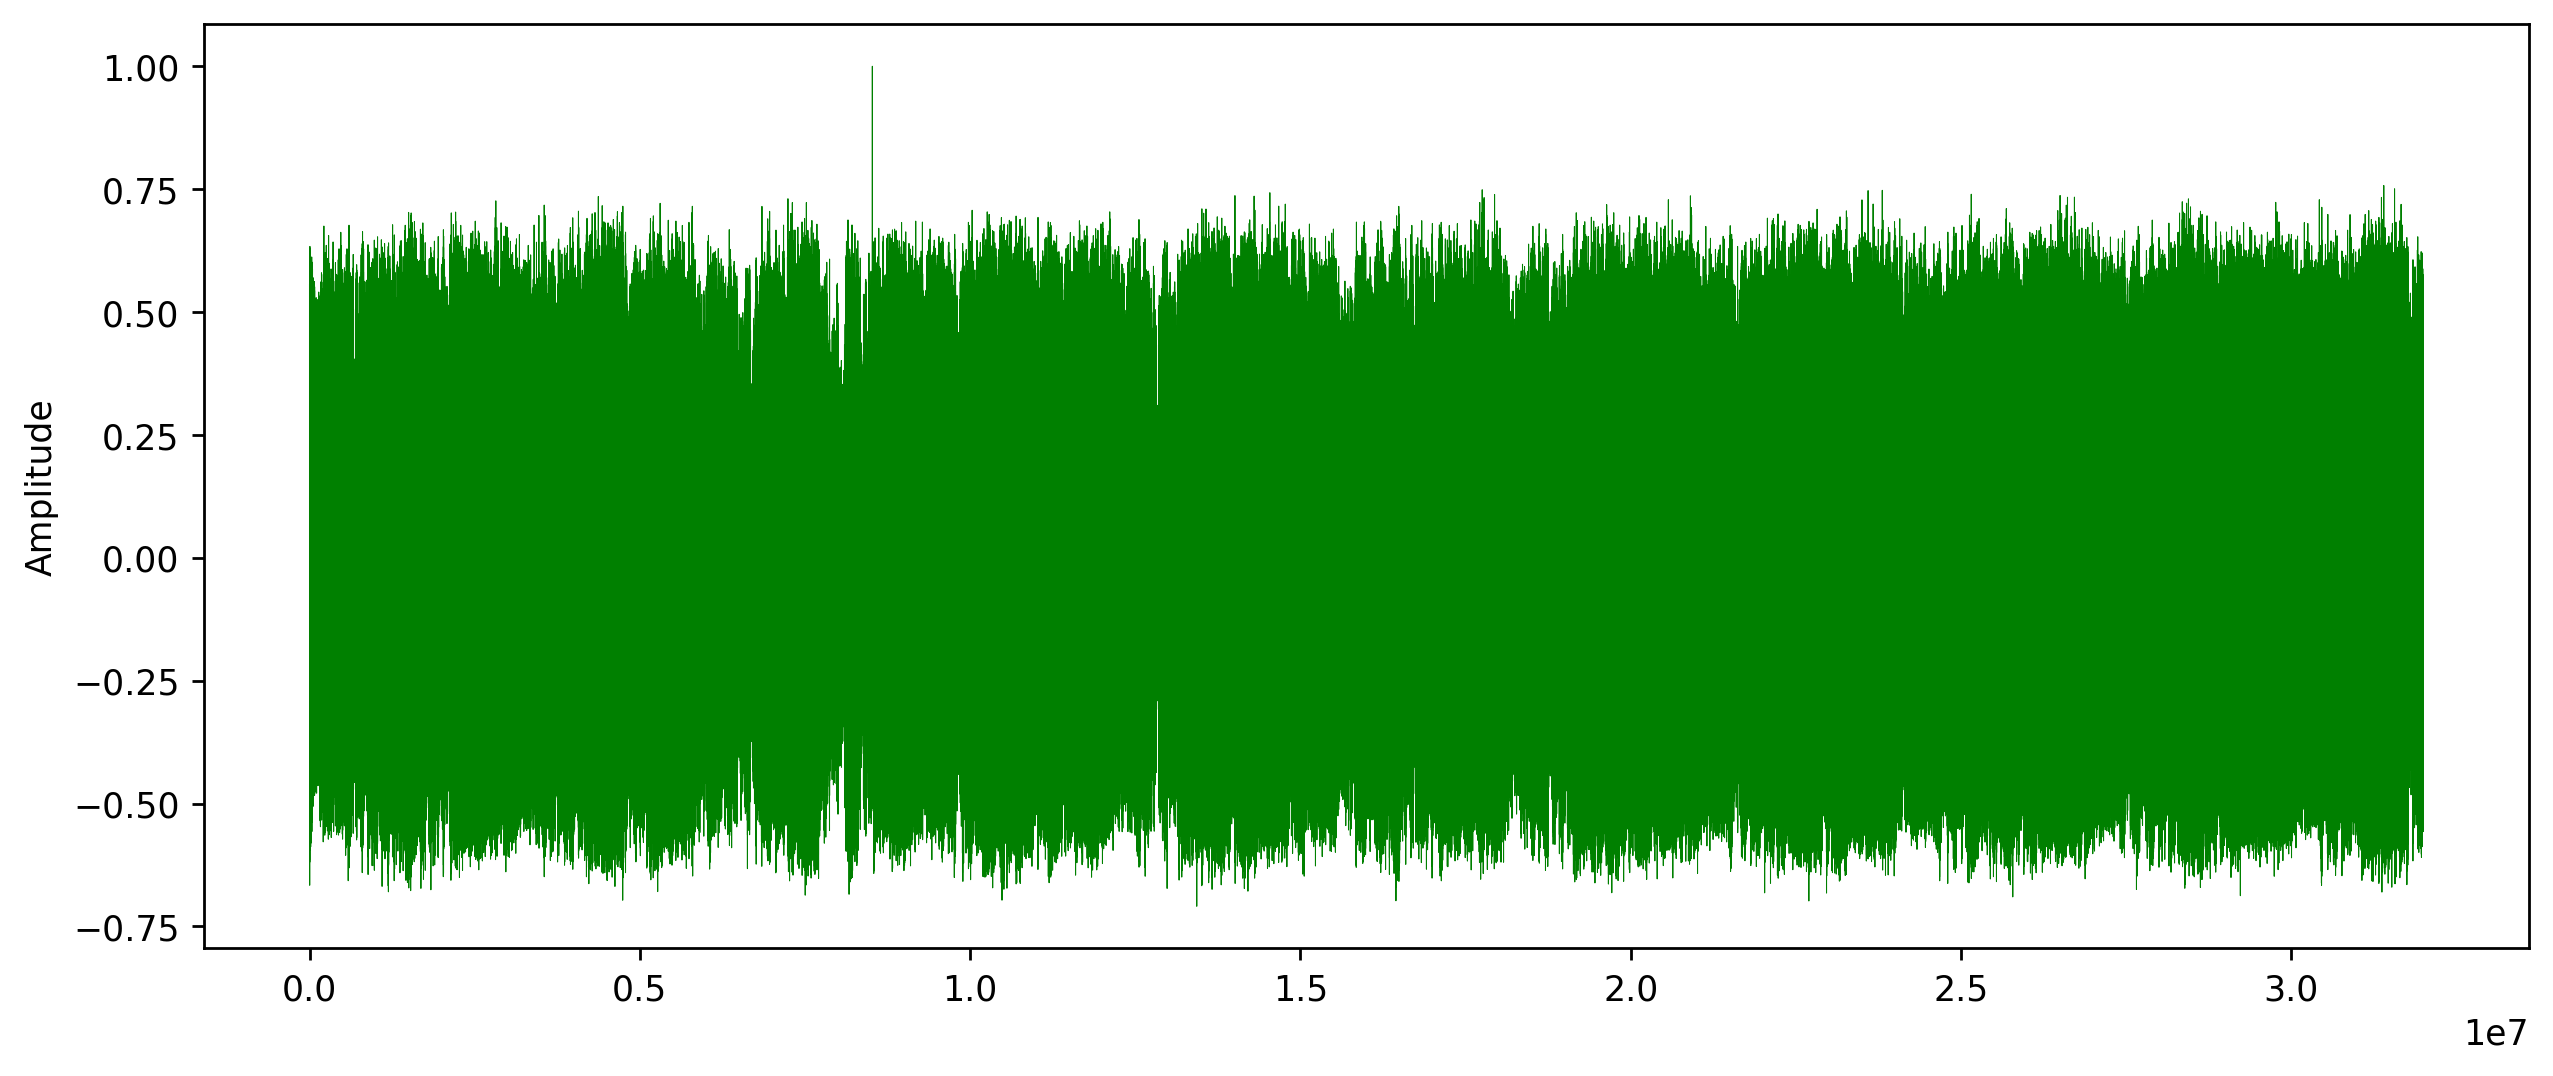

In [ ]:
# prepare match result figures for long trace

# length = len(traces_ori[0, :]) # 340_000
ass = 1/2.5

figsize = plt.figaspect(ass)
fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

# # create a figure with 3 subplots arranged vertically
# fig, axs = plt.subplots(3, 1, figsize=(6, 8))

traces_ori_points = np.array(range(0, len(traces_ori[0, :])))
ax.plot(traces_ori_points, traces_ori[0, :]/np.max(traces_ori[0, :]), linewidth=0.1)

# traces_ori_points = np.array(range(start_ori, end_ori))
# ax.plot(traces_ori_points, traces_ori[0, start_ori:end_ori]/np.max(traces_ori[0, start_ori:end_ori]), linewidth=0.1)
# ax.plot(traces_ori[0, :], linewidth=0.1)
# ax.set_title('Unknown side channel trace (zoom in)')
ax.set_ylabel('Amplitude')
# ax.set_xlabel('Location')

# plt.savefig("target-trace-3-1.png")
plt.show()

# figsize = plt.figaspect(ass)
fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

ax.plot(traces_ori_points, trigger_trace_ori[0, :]/np.max(trigger_trace_ori[0, :]), linewidth=0.1, color='red')

# ax.plot(traces_ori_points, trigger_trace_ori[0, start_ori:end_ori]/np.max(trigger_trace_ori[0, start_ori:end_ori]), linewidth=0.1, color='red')

# ax.plot(similar_result[:], linewidth=0.1, color='green')
# ax.set_title('Ground truth location (zoom in)')
ax.set_ylabel('Amplitude')
# ax.set_xlabel('Location')

# plt.savefig("groundtruth-3-2.png")
plt.show()

# figsize = plt.figaspect(ass)
fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

similar_result_points = np.array(range(0, len(similar_result[:])))*match_stride
ax.plot(similar_result_points, similar_result[:]/np.max(similar_result[:]), linewidth=0.3, color='green')

# similar_result_points = np.array(range(start_ori//match_stride, end_ori//match_stride))*match_stride
# ax.plot(similar_result_points, similar_result[start_ori//match_stride:end_ori//match_stride]/np.max(similar_result[start_ori//match_stride:end_ori//match_stride]), linewidth=0.3, color='green')

# ax.plot(similar_result[:], linewidth=0.1, color='green')
# ax.set_title('Matching result v.s Ground truth')
ax.set_ylabel('Amplitude')
# ax.set_xlabel('Location')
# ax.legend([
#         "Target trace",
#         "Ground truth value",
#         "Similarity Score",
#     ],
#     prop={'size': 6}
# )

# similar_result_range = list(range(start_ori//match_stride, end_ori//match_stride))
# similar_result_range_interp = list(range(start_ori, end_ori))
# similar_result_interp =  np.interp(similar_result_range_interp, similar_result_range, similar_result[start_ori//match_stride:end_ori//match_stride])
# ax.plot(similar_result_interp, linewidth=0.1, color='green')

# plt.savefig("match-result-vs-groundtruth-long-large.png")
# plt.savefig("match-result-vs-groundtruth-long-zoomin.png")
# plt.savefig("match-result-3-3.png")
plt.show()

In [ ]:
raise

RuntimeError: No active exception to reraise

In [ ]:
from scipy import signal, stats

def get_t_p(a, b):
    print(stats.levene(a, b))
    t, p= stats.ttest_ind(a,b, equal_var=False)
    print("t = " + str(t))
    print("p = " + str(2*p))
    return t, p

trigger_ori_edges = get_trigger_edges(trigger_trace_ori[0, :], 0.5)

print(trigger_ori_edges)

inner_edges = [trigger_ori_edges[0][0]//match_stride, trigger_ori_edges[1][0]//match_stride]
inner = similar_result[inner_edges[0]:inner_edges[1]]
outter = similar_result[:inner_edges[0]] + similar_result[inner_edges[1]:]

print(inner[:10])
print(outter[:10])

get_t_p(inner, outter)

[[8496983]
 [8543464]]
[0.41545437153932024, 0.40923458280623326, 0.3949314231634368, 0.3962868438988255, 0.40600982516356554, 0.39905809875566906, 0.39352788201965766, 0.3872045417577608, 0.3885494321664704, 0.38708988313041326]
[0.35536601559062875, 0.36036761672850176, 0.35718866726763665, 0.33687960167629966, 0.34270578769355486, 0.3410845172394388, 0.3372535543132099, 0.33737285778354154, 0.3537597067894251, 0.35397262720926503]
LeveneResult(statistic=3.4890273235635725, pvalue=0.061777329116768025)
t = 64.5234048856675
p = 0.0


(64.5234048856675, 0.0)

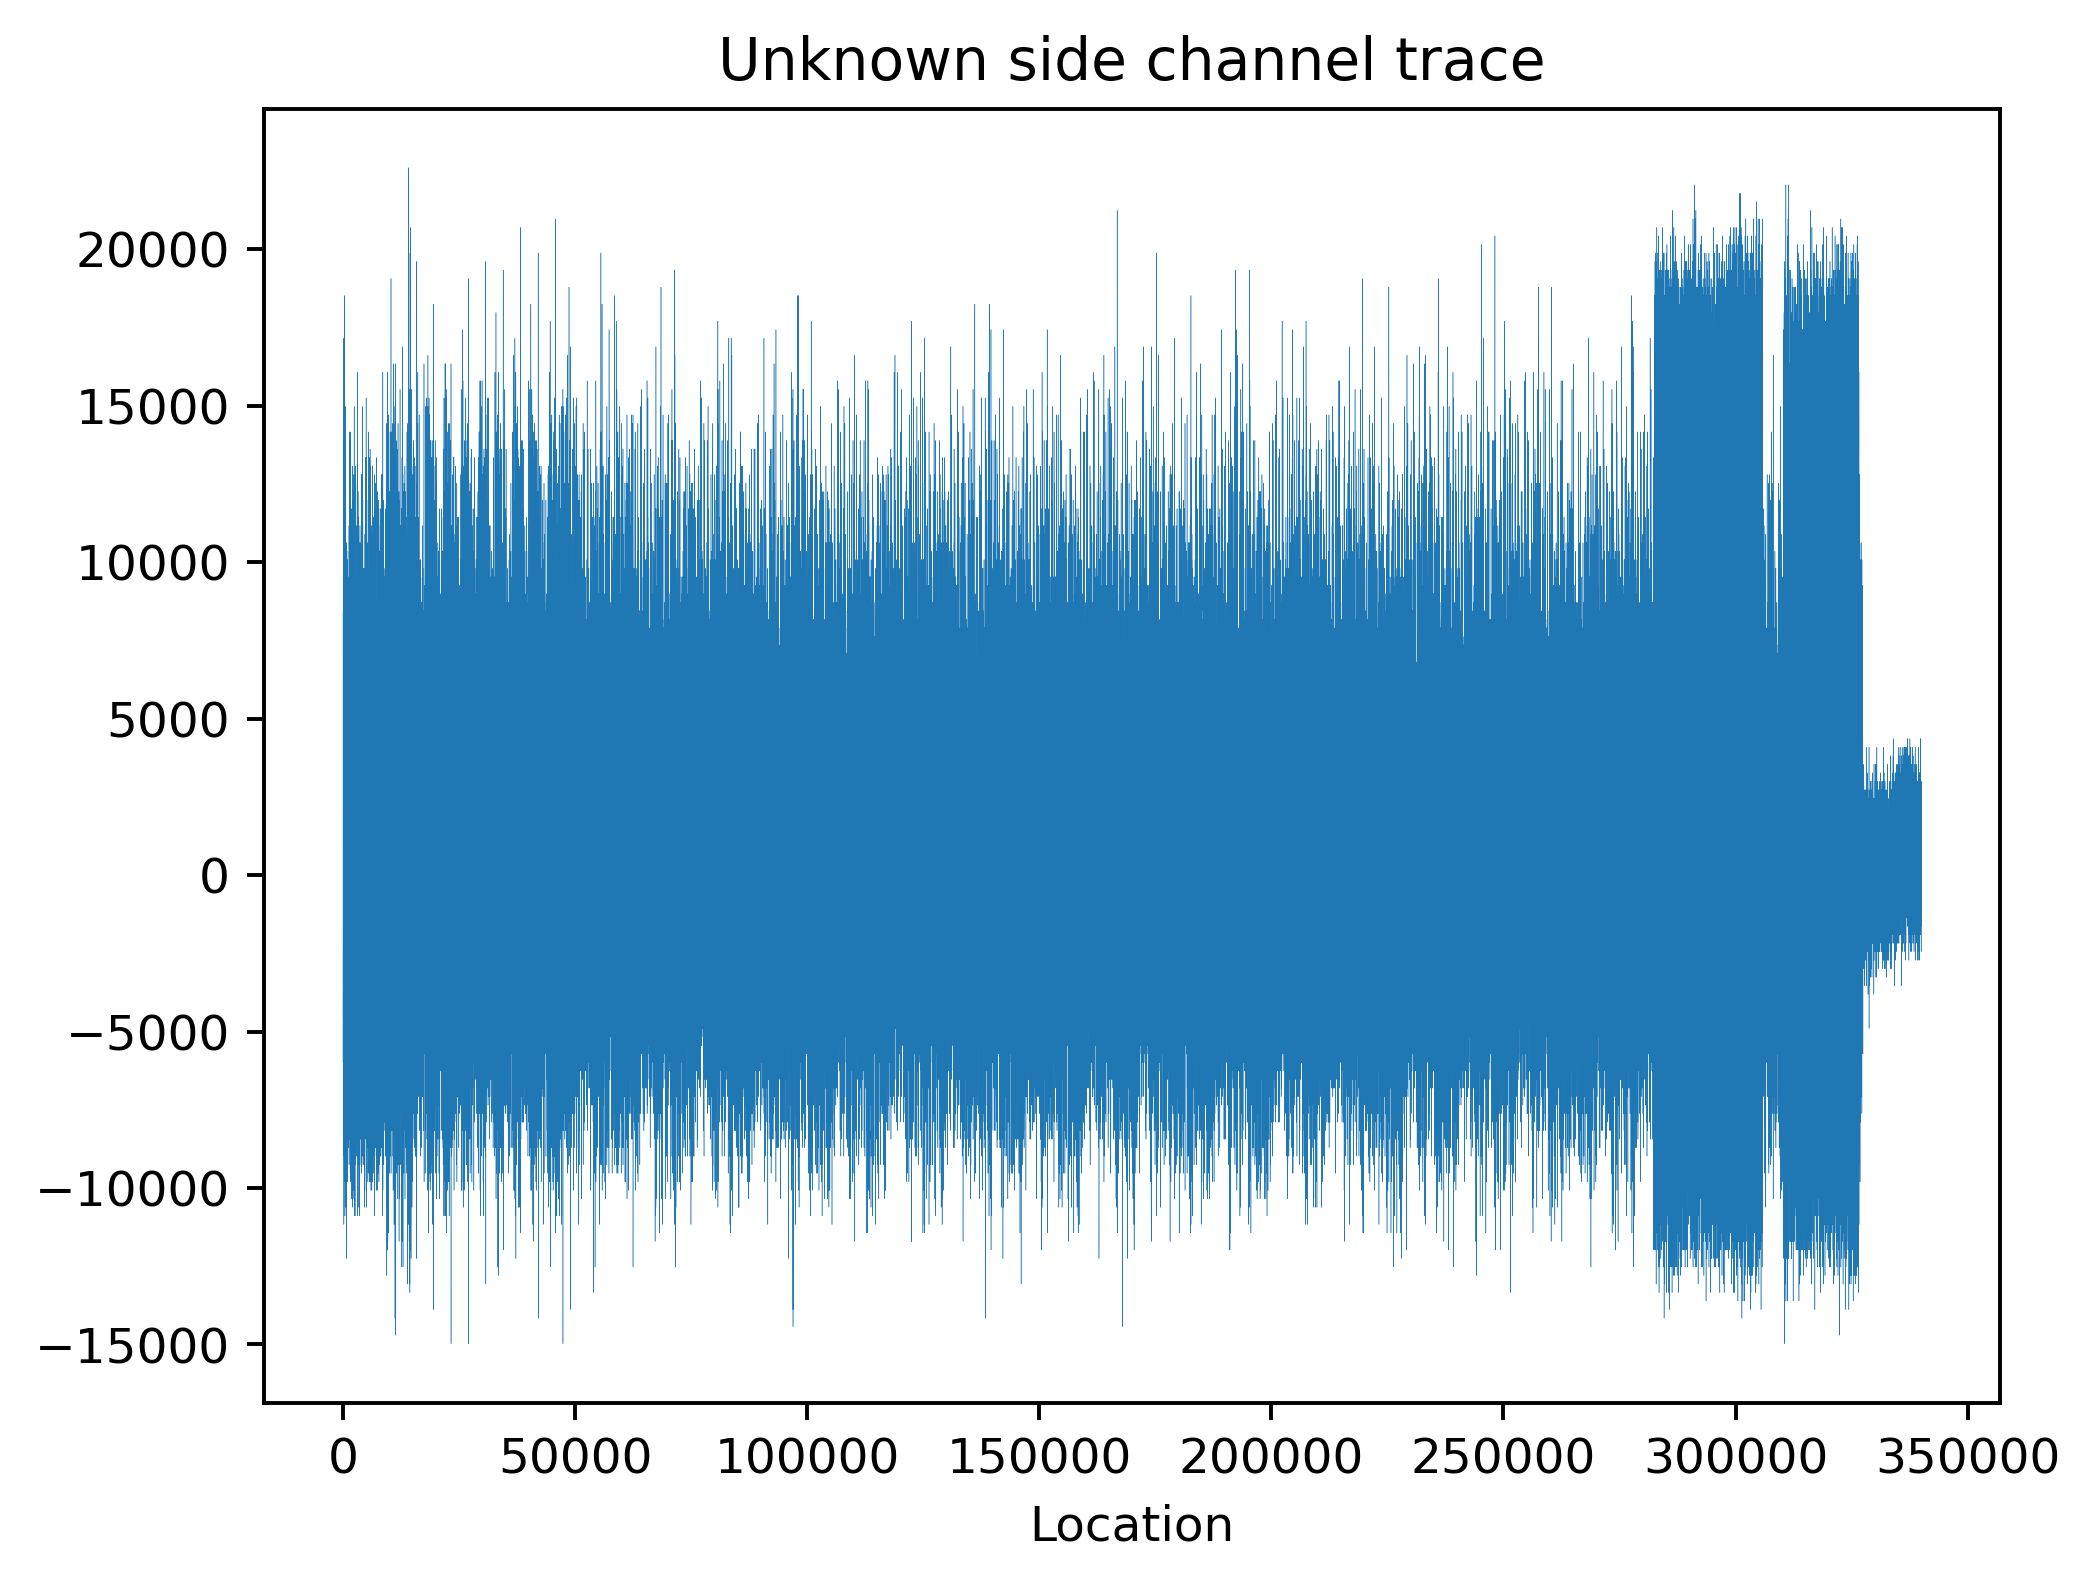

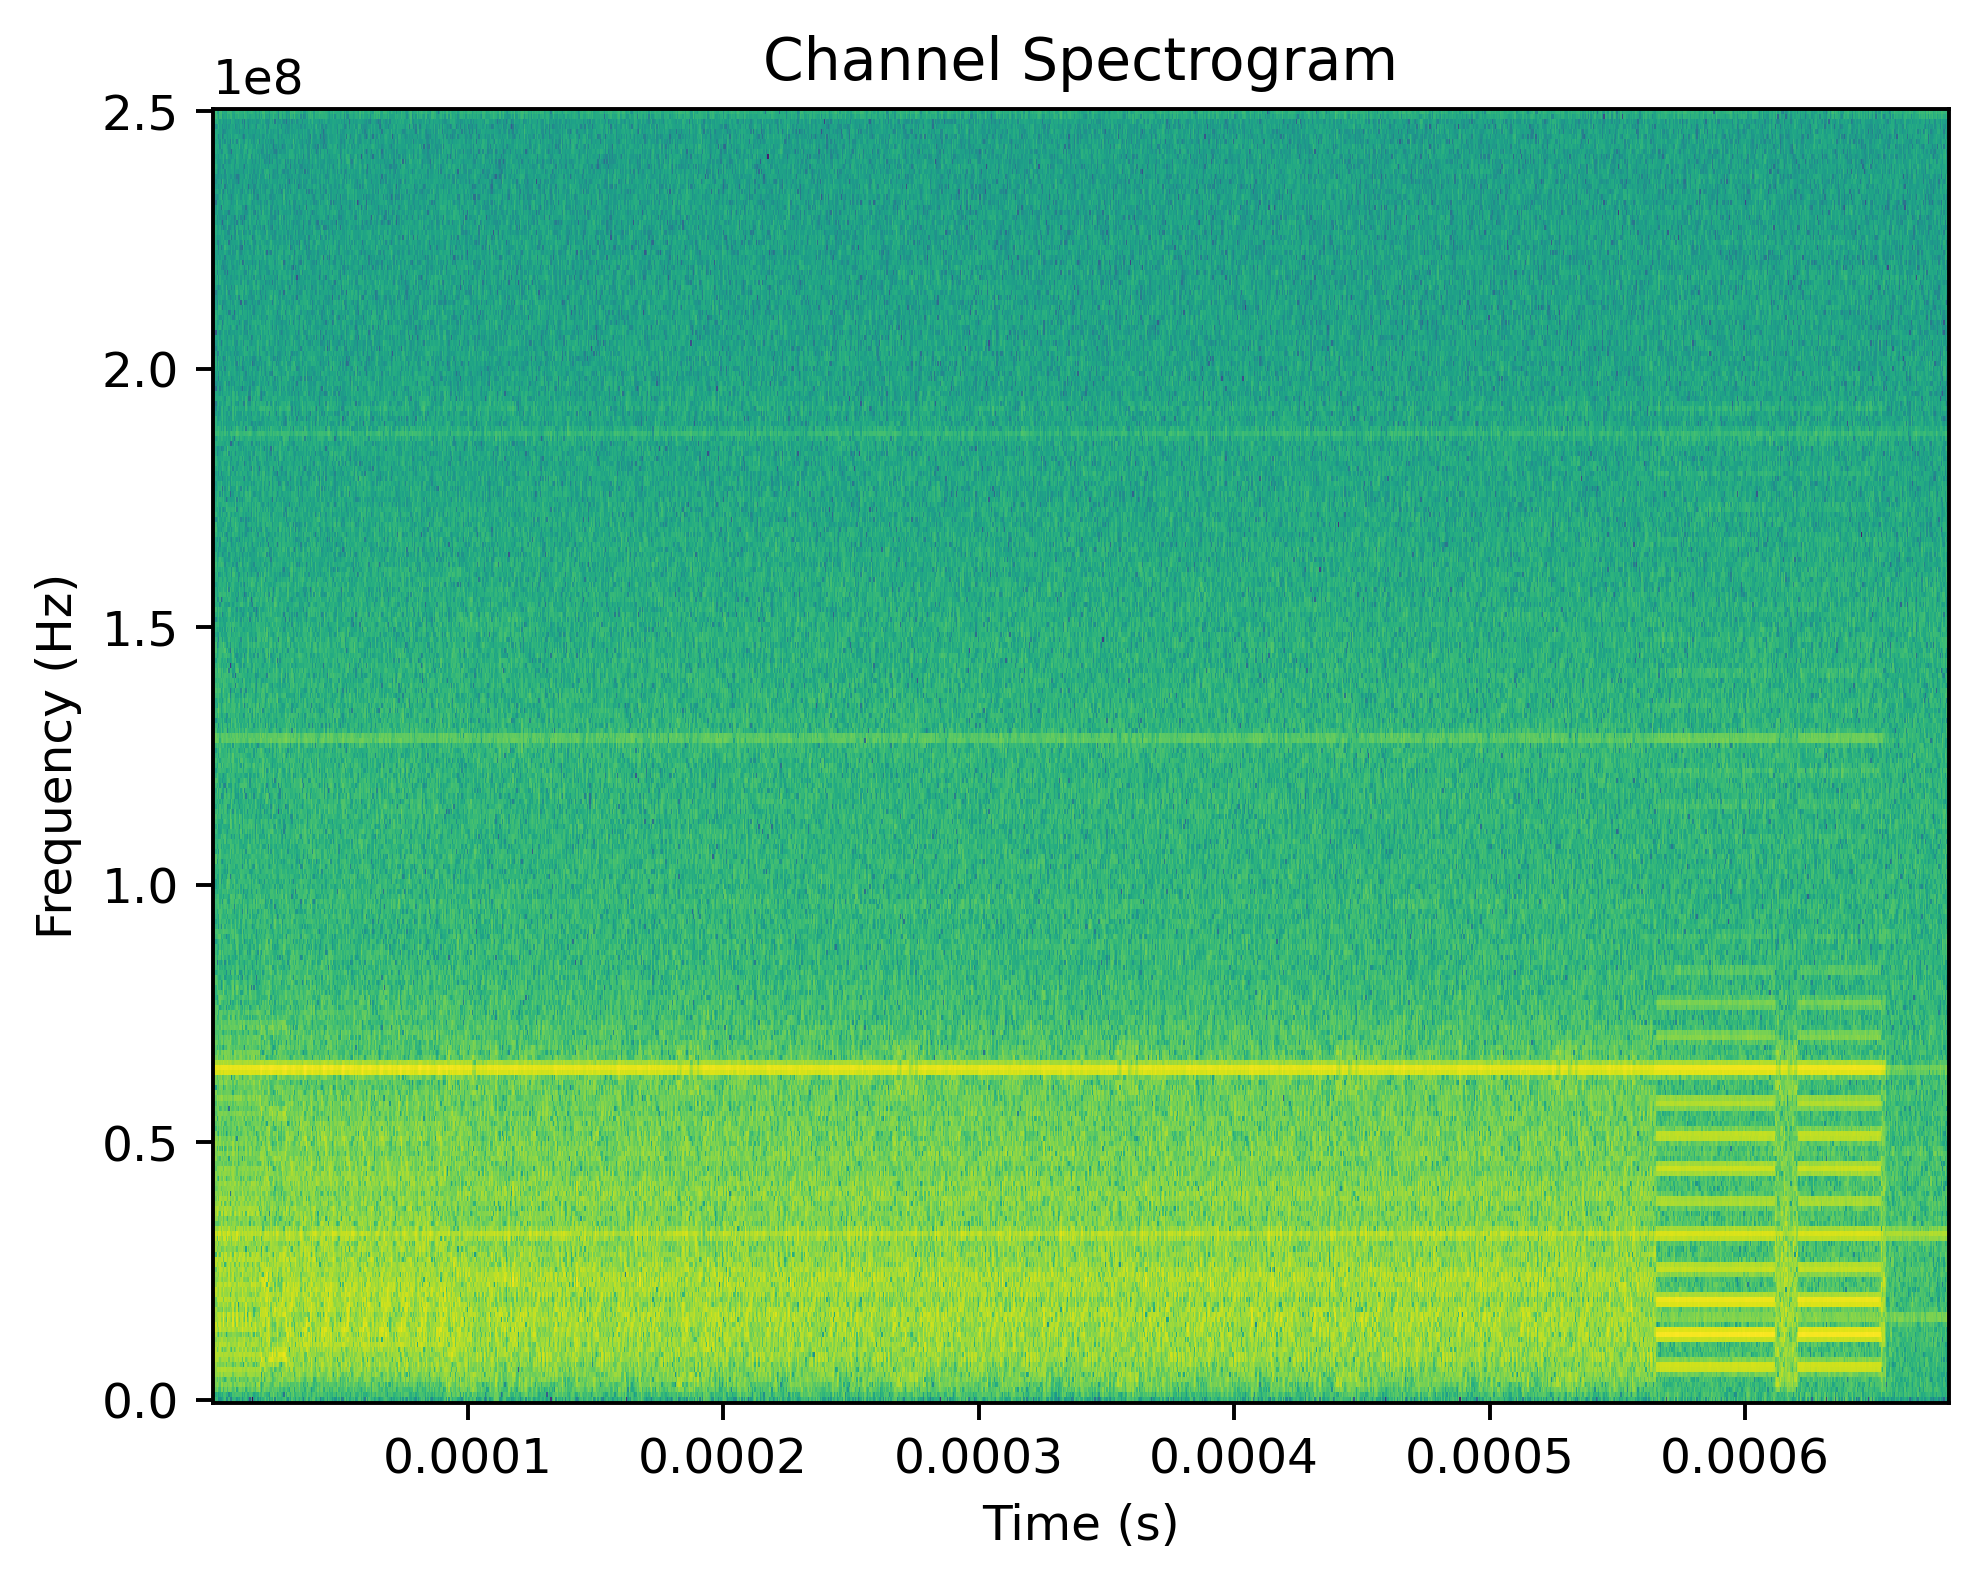

In [ ]:
length = 340_000
ass = 1/2

figsize = plt.figaspect(ass)
# fig, ax = plt.subplots(figsize=figsize)
fig, ax = plt.subplots()

ax.plot(traces_ori[0, :length], linewidth=0.1)
ax.set_title('Unknown side channel trace')
# ax.ylabel('Similarity Score')
ax.set_xlabel('Location')

# plt.savefig("unknown-trace-example.png")
plt.show()

sample_interval = 2e-9 # 2ns
plot_spectrom(channel_data=traces_ori[0, :length], fs=int(1/sample_interval)) 

# figsize = plt.figaspect(ass)
# # fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

# ax.plot(similar_result[:length], linewidth=0.1, color='green')
# ax.set_title('Similarity Score')
# # ax.ylabel('Similarity Score')
# ax.set_xlabel('Location')


# plt.savefig("match-result-example.png")
plt.show()

In [ ]:
raise

RuntimeError: No active exception to reraise